<a href="https://colab.research.google.com/github/runhanshi/Data-Analytics-House-Sales-in-King-County/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House sales in King County



# **Problem Description**


When purchasing a home, numerous considerations come into play, and these factors can have a substantial influence on the price, thereby affecting the decision-making process. Given the complexity of these factors involved, using statistical models and analysis becomes essential for evaluating the reasonableness of the current housing prices and for predicting the price for each individual property.

I analyze a home dataset from King County (WA) using linear Regression, Forward Stepwise selection, Backward Stepwise selection, K-fold cross validation, and Regularization methods to identify the optimal model and most relevant features that will enable more accurate predictions of house sale prices.

**What are the features?**

A data frame with 17614 observations on the following 20 variables.
* id - Unique ID for each home sold
* date - Date of the home sale
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

**What is the response?**
* price - Price of each home sold

**What is the goal?**
* The goal is to predict the sales price for each house based on the given features and select the best model and best features.

**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np

# **Data Browsing**

Utilize the pandas library to load training_dataset CSV files into Google Colab.

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('training_dataset-1.csv')

Saving training_dataset-1.csv to training_dataset-1.csv



Employ the head() function to show the initial 10 entries and examine its original attributes.

In [ ]:
data.head(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
0  3787000140  20140901T000000   450000         3       2.25         1780   
1  1934800078  20140930T000000   430000         2       2.25         1040   
2  7331900290  20140731T000000   230000         4       1.50         1520   
3  3438500798  20140715T000000   275000         3       1.50         1060   
4  2697400020  20141031T000000   400000         3       2.00         1350   
5  3869900146  20141030T000000   306500         2       1.00          840   
6  1257201130  20141001T000000  1015000         4       2.50         2700   
7  1277000240  20150402T000000   735000         3       2.50         2540   
8   982850060  20140603T000000   400000         3       2.25         1450   
9  3663000070  20140708T000000   600000         3       2.25         1900   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      9969     1.0           0     0  ...      8        1450            330   
1      1516     2.0           0     0  ...      8        1040              0   
2      8800     1.0           0     0  ...      7        1520              0   
3      6954     1.0           0     0  ...      6        1060              0   
4      7216     1.0           0     0  ...      7        1350              0   
5       892     2.0           0     0  ...      7         840              0   
6      4590     2.0           0     0  ...      8        2700              0   
7      6762     2.0           0     0  ...     10        2540              0   
8      4706     2.0           0     0  ...      7        1450              0   
9     46609     1.5           0     0  ...      7        1440            460   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1985             0    98034  47.7286 -122.168           1950   
1      2008             0    98122  47.6037 -122.307           1560   
2      1960             0    98002  47.3136 -122.208           1370   
3      1983             0    98106  47.5498 -122.355           1560   
4      1964             0    98177  47.7616 -122.365           1920   
5      2006             0    98136  47.5396 -122.387           1030   
6      2002             0    98103  47.6734 -122.329           2080   
7      1998             0    98007  47.6239 -122.144           2870   
8      2009             0    98028  47.7610 -122.232           1490   
9      1969             0    98072  47.7529 -122.116           2460   

   sqft_lot15  
0        7974  
1        1920  
2        8800  
3        6954  
4        7600  
5        1007  
6        3570  
7        6631  
8        4667  
9       43560  

[10 rows x 21 columns]

Examine the shape (number of rows and columns) of the DataFrame.

In [ ]:
data.shape

(17614, 21)

Inspect the data types of the variables.

In [ ]:
data.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Apply the describe() function to obtain summary statistics which provide insights into the dataset's central tendency, dispersion and shape of a dataset’s distribution, excluding any NaN values.

In [ ]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.761400e+04  1.761400e+04  17614.000000  17614.000000  17614.000000   
mean   4.569068e+09  5.408514e+05      3.372431      2.113475   2080.915692   
std    2.869570e+09  3.685506e+05      0.935641      0.773550    923.863759   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.122052e+09  3.225000e+05      3.000000      1.500000   1420.000000   
50%    3.904985e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.300200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.761400e+04  17614.000000  17614.000000  17614.000000  17614.000000   
mean   1.513310e+04      1.495856      0.007097      0.233848      3.409844   
std    4.194362e+04      0.540092      0.083944      0.765230      0.649949   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.053250e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.607000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.065000e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  17614.000000  17614.000000   17614.000000  17614.000000  17614.000000   
mean       7.660100   1789.456398     291.459294   1970.917566     80.774384   
std        1.179174    831.418845     443.419741     29.425821    393.288442   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  17614.000000  17614.000000  17614.000000   17614.000000   17614.000000  
mean   98078.043204     47.560487   -122.214127    1985.633303   12680.009424  
std       53.473239      0.138408      0.140161     685.581487   26713.761385  
min    98001.000000     47.155900   -122.519000     399.000000     659.000000  
25%    98033.000000     47.471600   -122.328000    1480.000000    5100.000000  
50%    98065.000000     47.572700   -122.230000    1840.000000    7600.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10057.250000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# **Data Cleansing**

*   Identifying errors and missing values in the dataset
*   Discerning patterns within the data.


## Step 1: check for any missing data

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Step 2: check for duplicate data

In [ ]:
id_counts = data['id'].value_counts()
duplicate_ids = id_counts[id_counts > 1]

print(duplicate_ids)

1781500435    2
1139600270    2
4222310010    2
1217000340    2
4364700600    2
             ..
1237500540    2
7853400250    2
1432400120    2
3185600040    2
1446403850    2
Name: id, Length: 120, dtype: int64


In [ ]:
data[data['id'] == 1781500435]

id             date   price  bedrooms  bathrooms  sqft_living  \
8820   1781500435  20140820T000000  260000         3       1.75         1580   
16246  1781500435  20150225T000000  575000         3       1.75         1580   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8820       7344     1.0           0     0  ...      7        1580   
16246      7344     1.0           0     0  ...      7        1580   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
8820               0      1911             0    98126  47.5256 -122.38   
16246              0      1911             0    98126  47.5256 -122.38   

       sqft_living15  sqft_lot15  
8820            1580        6207  
16246           1580        6207  

[2 rows x 21 columns]

## **Step3: Converting Year Columns to Reflect Actual Age**

Convert the 'yr_built' column to '**age_built**', representing the age of the house.

Convert the 'yr_renovated' column to '**age_renovated**', indicating the age since the renovation.

In [ ]:
data['yr_sold'] = data['date'].astype(str).str[:4].astype(int)
data['age_built'] = data['yr_sold'] - data['yr_built']
data['age_renovated'] = data['yr_sold'] - data['yr_renovated'].where(data['yr_renovated'] != 0, data['yr_built'])

data.head(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
0  3787000140  20140901T000000   450000         3       2.25         1780   
1  1934800078  20140930T000000   430000         2       2.25         1040   
2  7331900290  20140731T000000   230000         4       1.50         1520   
3  3438500798  20140715T000000   275000         3       1.50         1060   
4  2697400020  20141031T000000   400000         3       2.00         1350   
5  3869900146  20141030T000000   306500         2       1.00          840   
6  1257201130  20141001T000000  1015000         4       2.50         2700   
7  1277000240  20150402T000000   735000         3       2.50         2540   
8   982850060  20140603T000000   400000         3       2.25         1450   
9  3663000070  20140708T000000   600000         3       2.25         1900   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      9969     1.0           0     0  ...      1985             0    98034   
1      1516     2.0           0     0  ...      2008             0    98122   
2      8800     1.0           0     0  ...      1960             0    98002   
3      6954     1.0           0     0  ...      1983             0    98106   
4      7216     1.0           0     0  ...      1964             0    98177   
5       892     2.0           0     0  ...      2006             0    98136   
6      4590     2.0           0     0  ...      2002             0    98103   
7      6762     2.0           0     0  ...      1998             0    98007   
8      4706     2.0           0     0  ...      2009             0    98028   
9     46609     1.5           0     0  ...      1969             0    98072   

       lat     long  sqft_living15  sqft_lot15  yr_sold  age_built  \
0  47.7286 -122.168           1950        7974     2014         29   
1  47.6037 -122.307           1560        1920     2014          6   
2  47.3136 -122.208           1370        8800     2014         54   
3  47.5498 -122.355           1560        6954     2014         31   
4  47.7616 -122.365           1920        7600     2014         50   
5  47.5396 -122.387           1030        1007     2014          8   
6  47.6734 -122.329           2080        3570     2014         12   
7  47.6239 -122.144           2870        6631     2015         17   
8  47.7610 -122.232           1490        4667     2014          5   
9  47.7529 -122.116           2460       43560     2014         45   

   age_renovated  
0             29  
1              6  
2             54  
3             31  
4             50  
5              8  
6             12  
7             17  
8              5  
9             45  

[10 rows x 24 columns]

## **Step4: Remove abnormal data in the 'bedrooms' and 'bathrooms'**


*   bedrooms = 33

*   (bedrooms = 0) & (bathrooms > 1)

In [ ]:
sorted_data = data.sort_values(by='bedrooms', ascending=False)
sorted_data.head(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
2700   2402100895  20140625T000000   640000        33       1.75         1620   
3585    627300145  20140814T000000  1148000        10       5.25         4590   
14945  5566100170  20141029T000000   650000        10       2.00         3610   
6440   9822700190  20140808T000000  1280000         9       4.50         3650   
11633  8823900290  20150317T000000  1400000         9       4.00         4620   
16842  1997200215  20140507T000000   599999         9       4.50         3830   
17200   424049043  20140811T000000   450000         9       7.50         4050   
16315   685000115  20141007T000000  2150000         8       6.00         4340   
15380  2769600590  20141016T000000   900000         8       4.00         4020   
16207  1652500060  20140711T000000  1650000         8       2.75         4040   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
2700       6000     1.0           0     0  ...      1947             0   
3585      10920     1.0           0     2  ...      2008             0   
14945     11914     2.0           0     0  ...      1958             0   
6440       5000     2.0           0     0  ...      1915          2010   
11633      5508     2.5           0     0  ...      1915             0   
16842      6988     2.5           0     0  ...      1938             0   
17200      6504     2.0           0     0  ...      1996             0   
16315      9415     2.0           0     0  ...      1967             0   
15380      7500     1.0           0     0  ...      1968             0   
16207     20666     1.0           0     0  ...      1962             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  yr_sold  \
2700     98103  47.6878 -122.331           1330        4700     2014   
3585     98004  47.5861 -122.113           2730       10400     2014   
14945    98006  47.5705 -122.175           2040       11914     2014   
6440     98105  47.6604 -122.289           2510        5000     2014   
11633    98105  47.6684 -122.309           2710        4320     2015   
16842    98103  47.6927 -122.338           1460        6291     2014   
17200    98144  47.5923 -122.301           1448        3866     2014   
16315    98004  47.6316 -122.202           2050        9100     2014   
15380    98107  47.6732 -122.363           1560        3737     2014   
16207    98004  47.6340 -122.221           3670       20500     2014   

       age_built  age_renovated  
2700          67             67  
3585           6              6  
14945         56             56  
6440          99              4  
11633        100            100  
16842         76             76  
17200         18             18  
16315         47             47  
15380         46             46  
16207         52             52  

[10 rows x 24 columns]

In [ ]:
data = data[data['bedrooms'] != 33]

In [ ]:
sorted_data.tail(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
2211   2569500210  20141117T000000   339950         0        2.5         2290   
13637  6896300380  20141002T000000   228000         0        1.0          390   
11208  6306400140  20140612T000000  1095000         0        0.0         3064   
8048   2310060040  20140925T000000   240000         0        2.5         1810   
5768   3374500520  20150429T000000   355000         0        0.0         2460   
16523  7849202299  20150218T000000   320000         0        2.5         1490   
5490   2954400190  20140624T000000  1295648         0        0.0         4810   
15645  7849202190  20141223T000000   235000         0        0.0         1470   
4651   1453602309  20140805T000000   288000         0        1.5         1430   
15746  9543000205  20150413T000000   139950         0        0.0          844   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
2211       8319     2.0           0     0  ...      1985             0   
13637      5900     1.0           0     0  ...      1953             0   
11208      4764     3.5           0     2  ...      1990             0   
8048       5669     2.0           0     0  ...      2003             0   
5768       8049     2.0           0     0  ...      1990             0   
16523      7111     2.0           0     0  ...      1999             0   
5490      28008     2.0           0     0  ...      1990             0   
15645      4800     2.0           0     0  ...      1996             0   
4651       1650     3.0           0     0  ...      1999             0   
15746      4269     1.0           0     0  ...      1913             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  yr_sold  \
2211     98042  47.3473 -122.151           2500        8751     2014   
13637    98118  47.5260 -122.261           2170        6000     2014   
11208    98102  47.6362 -122.322           2360        4000     2014   
8048     98038  47.3493 -122.053           1810        5685     2014   
5768     98031  47.4095 -122.168           2520        8050     2015   
16523    98065  47.5261 -121.826           1500        4675     2015   
5490     98053  47.6642 -122.069           4740       35061     2014   
15645    98065  47.5265 -121.828           1060        7200     2014   
4651     98125  47.7222 -122.290           1430        1650     2014   
15746    98001  47.2781 -122.250           1380        9600     2015   

       age_built  age_renovated  
2211          29             29  
13637         61             61  
11208         24             24  
8048          11             11  
5768          25             25  
16523         16             16  
5490          24             24  
15645         18             18  
4651          15             15  
15746        102            102  

[10 rows x 24 columns]

In [ ]:
data = data[~((data['bedrooms'] == 0) & (data['bathrooms'] > 1))]

data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.760900e+04  1.760900e+04  17609.000000  17609.000000  17609.000000   
mean   4.569423e+09  5.409011e+05      3.371515      2.113465   2081.015901   
std    2.869638e+09  3.685834e+05      0.907324      0.773624    923.961035   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.122049e+09  3.225000e+05      3.000000      1.500000   1420.000000   
50%    3.904990e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.300200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     10.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.760900e+04  17609.000000  17609.000000  17609.000000  17609.000000   
mean   1.513577e+04      1.495712      0.007099      0.233914      3.409847   
std    4.194926e+04      0.539997      0.083956      0.765329      0.649902   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.053000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.609000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.065000e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...      yr_built  yr_renovated       zipcode           lat  \
count  ...  17609.000000  17609.000000  17609.000000  17609.000000   
mean   ...   1970.913113     80.797320  98078.044182     47.560496   
std    ...     29.426740    393.341922     53.477698      0.138400   
min    ...   1900.000000      0.000000  98001.000000     47.155900   
25%    ...   1951.000000      0.000000  98033.000000     47.471600   
50%    ...   1975.000000      0.000000  98065.000000     47.572700   
75%    ...   1997.000000      0.000000  98118.000000     47.678000   
max    ...   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15       yr_sold     age_built  \
count  17609.000000   17609.000000   17609.000000  17609.000000  17609.000000   
mean    -122.214151    1985.710432   12682.163950   2014.323925     43.410813   
std        0.140141     685.626224   26717.220367      0.467985     29.430003   
min     -122.519000     399.000000     659.000000   2014.000000     -1.000000   
25%     -122.328000    1480.000000    5100.000000   2014.000000     18.000000   
50%     -122.230000    1840.000000    7600.000000   2014.000000     40.000000   
75%     -122.125000    2360.000000   10059.000000   2015.000000     63.000000   
max     -121.315000    6210.000000  871200.000000   2015.000000    115.000000   

       age_renovated  
count   17609.000000  
mean       41.149810  
std        28.893716  
min        -1.000000  
25%        16.000000  
50%        37.000000  
75%        60.000000  
max       115.000000  

[8 rows x 23 columns]

## **Step5:Processing Location Data Using Latitude and Longitude Coordinates**

Manage the location variable by utilizing the 'latitude' and 'longitude' values.

In [ ]:
def convert_to_polar_coordinates(lat, lon):

    lat_min = data['lat'].min()
    lon_min = data['long'].min()

    radius= np.sqrt((lat - lat_min)**2 + (lon - lon_min)**2)
    angle = (np.arctan2(lon - lon_min, lat - lat_min) * 180 / np.pi).round(8)

    return radius, angle

data['radius'], data['angle'] = convert_to_polar_coordinates(data['lat'], data['long'])

data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.760900e+04  1.760900e+04  17609.000000  17609.000000  17609.000000   
mean   4.569423e+09  5.409011e+05      3.371515      2.113465   2081.015901   
std    2.869638e+09  3.685834e+05      0.907324      0.773624    923.961035   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.122049e+09  3.225000e+05      3.000000      1.500000   1420.000000   
50%    3.904990e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.300200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     10.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.760900e+04  17609.000000  17609.000000  17609.000000  17609.000000   
mean   1.513577e+04      1.495712      0.007099      0.233914      3.409847   
std    4.194926e+04      0.539997      0.083956      0.765329      0.649902   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.053000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.609000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.065000e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...       zipcode           lat          long  sqft_living15  \
count  ...  17609.000000  17609.000000  17609.000000   17609.000000   
mean   ...  98078.044182     47.560496   -122.214151    1985.710432   
std    ...     53.477698      0.138400      0.140141     685.626224   
min    ...  98001.000000     47.155900   -122.519000     399.000000   
25%    ...  98033.000000     47.471600   -122.328000    1480.000000   
50%    ...  98065.000000     47.572700   -122.230000    1840.000000   
75%    ...  98118.000000     47.678000   -122.125000    2360.000000   
max    ...  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15       yr_sold     age_built  age_renovated        radius  \
count   17609.000000  17609.000000  17609.000000   17609.000000  17609.000000   
mean    12682.163950   2014.323925     43.410813      41.149810      0.527675   
std     26717.220367      0.467985     29.430003      28.893716      0.130316   
min       659.000000   2014.000000     -1.000000      -1.000000      0.176029   
25%      5100.000000   2014.000000     18.000000      16.000000      0.440409   
50%      7600.000000   2014.000000     40.000000      37.000000      0.532695   
75%     10059.000000   2015.000000     63.000000      60.000000      0.621597   
max    871200.000000   2015.000000    115.000000     115.000000      1.326641   

              angle  
count  17609.000000  
mean      37.340148  
std       16.484433  
min        0.000000  
25%       22.737742  
50%       36.089407  
75%       48.950094  
max       90.000000  

[8 rows x 25 columns]

## **Step6: Organizing Location Data Based on Zipcode**


Manage the location variable utilizing the 'zipcode'


Match the zipcode with neighborhood categorizations, mirroring the approach of real estate platforms like Redfin.

In [ ]:
data.shape

(17609, 26)

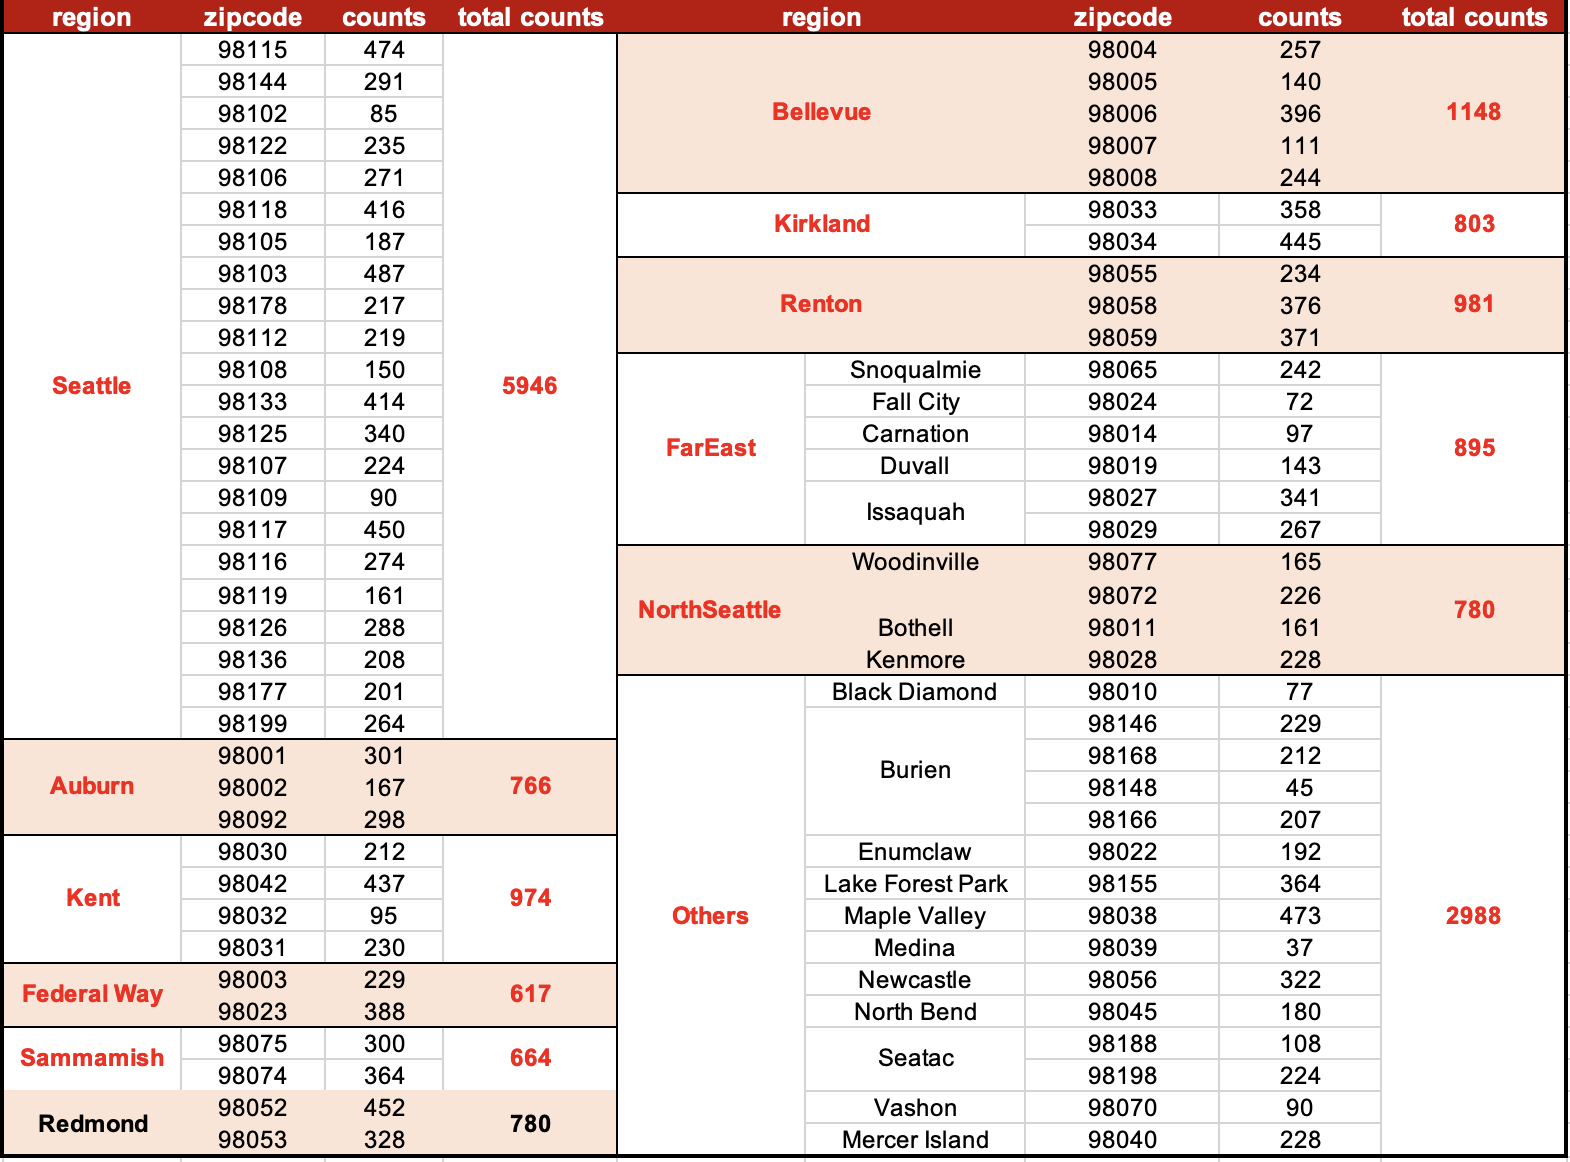

In [ ]:
# Reference the zipcode and neighborhood classification similar to the real estate website Redfin

data['region'] = 'Other'
data.loc[data['zipcode'].isin([98115, 98144,98102,98122,98106,98118,98105,98103,98178,98112,98108,98133,98125,98107,98109,98117,98116,98119,98126,98136,98177,98199]), 'region'] = 'Seattle'
data.loc[data['zipcode'].isin([98001, 98002, 98092]), 'region'] = 'Auburn'
data.loc[data['zipcode'].isin([98030,98042,98032,98031]), 'region'] = 'Kent'
data.loc[data['zipcode'].isin([98003,98023]), 'region'] = 'FederalWay'
data.loc[data['zipcode'].isin([98075,98074]), 'region'] = 'Sammamish'
data.loc[data['zipcode'].isin([98052,98053]), 'region'] = 'Redmond'
data.loc[data['zipcode'].isin([98004,98005,98006,98007,98008]), 'region'] = 'Bellevue'
data.loc[data['zipcode'].isin([98033,98034]), 'region'] = 'Kirkland'
data.loc[data['zipcode'].isin([98055,98058,98059]), 'region'] = 'Renton'
data.loc[data['zipcode'].isin([98065,98024,98014,98019,98027,98029]), 'region'] = 'FarEast'
data.loc[data['zipcode'].isin([98077, 98072, 98011, 98028]), 'region'] = 'NorthSeattle'

data['region']


0        Kirkland
1         Seattle
2          Auburn
3         Seattle
4         Seattle
           ...   
17609     Seattle
17610       Other
17611       Other
17612     Seattle
17613       Other
Name: region, Length: 17609, dtype: object

In [ ]:
region_counts = data['region'].value_counts()
region_counts

Seattle         5946
Other           2988
FarEast         1162
Bellevue        1148
Renton           981
Kent             974
Kirkland         803
NorthSeattle     780
Redmond          780
Auburn           766
Sammamish        664
FederalWay       617
Name: region, dtype: int64

In [ ]:
region_counts.index

Index(['Seattle', 'Other', 'FarEast', 'Bellevue', 'Renton', 'Kent', 'Kirkland',
       'NorthSeattle', 'Redmond', 'Auburn', 'Sammamish', 'FederalWay'],
      dtype='object')

In [ ]:
# One-Hot Encoding Regions in the data DataFrame
for name in region_counts.index:
  if name != 'Other':
    data[f'region_{name}'] = data['region'].apply(lambda x: 1 if x == name else 0)

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'age_built',
       'age_renovated', 'radius', 'angle', 'region', 'region_Seattle',
       'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent',
       'region_Kirkland', 'region_NorthSeattle', 'region_Redmond',
       'region_Auburn', 'region_Sammamish', 'region_FederalWay'],
      dtype='object')

In [ ]:
data.head(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
0  3787000140  20140901T000000   450000         3       2.25         1780   
1  1934800078  20140930T000000   430000         2       2.25         1040   
2  7331900290  20140731T000000   230000         4       1.50         1520   
3  3438500798  20140715T000000   275000         3       1.50         1060   
4  2697400020  20141031T000000   400000         3       2.00         1350   
5  3869900146  20141030T000000   306500         2       1.00          840   
6  1257201130  20141001T000000  1015000         4       2.50         2700   
7  1277000240  20150402T000000   735000         3       2.50         2540   
8   982850060  20140603T000000   400000         3       2.25         1450   
9  3663000070  20140708T000000   600000         3       2.25         1900   

   sqft_lot  floors  waterfront  view  ...  region_FarEast  region_Bellevue  \
0      9969     1.0           0     0  ...               0                0   
1      1516     2.0           0     0  ...               0                0   
2      8800     1.0           0     0  ...               0                0   
3      6954     1.0           0     0  ...               0                0   
4      7216     1.0           0     0  ...               0                0   
5       892     2.0           0     0  ...               0                0   
6      4590     2.0           0     0  ...               0                0   
7      6762     2.0           0     0  ...               0                1   
8      4706     2.0           0     0  ...               0                0   
9     46609     1.5           0     0  ...               0                0   

   region_Renton  region_Kent  region_Kirkland  region_NorthSeattle  \
0              0            0                1                    0   
1              0            0                0                    0   
2              0            0                0                    0   
3              0            0                0                    0   
4              0            0                0                    0   
5              0            0                0                    0   
6              0            0                0                    0   
7              0            0                0                    0   
8              0            0                0                    1   
9              0            0                0                    1   

   region_Redmond  region_Auburn  region_Sammamish  region_FederalWay  
0               0              0                 0                  0  
1               0              0                 0                  0  
2               0              1                 0                  0  
3               0              0                 0                  0  
4               0              0                 0                  0  
5               0              0                 0                  0  
6               0              0                 0                  0  
7               0              0                 0                  0  
8               0              0                 0                  0  
9               0              0                 0                  0  

[10 rows x 38 columns]

## **Setp 7: Log Transformation**

Observe the histogram of continuous variables to determine if log transformation is needed

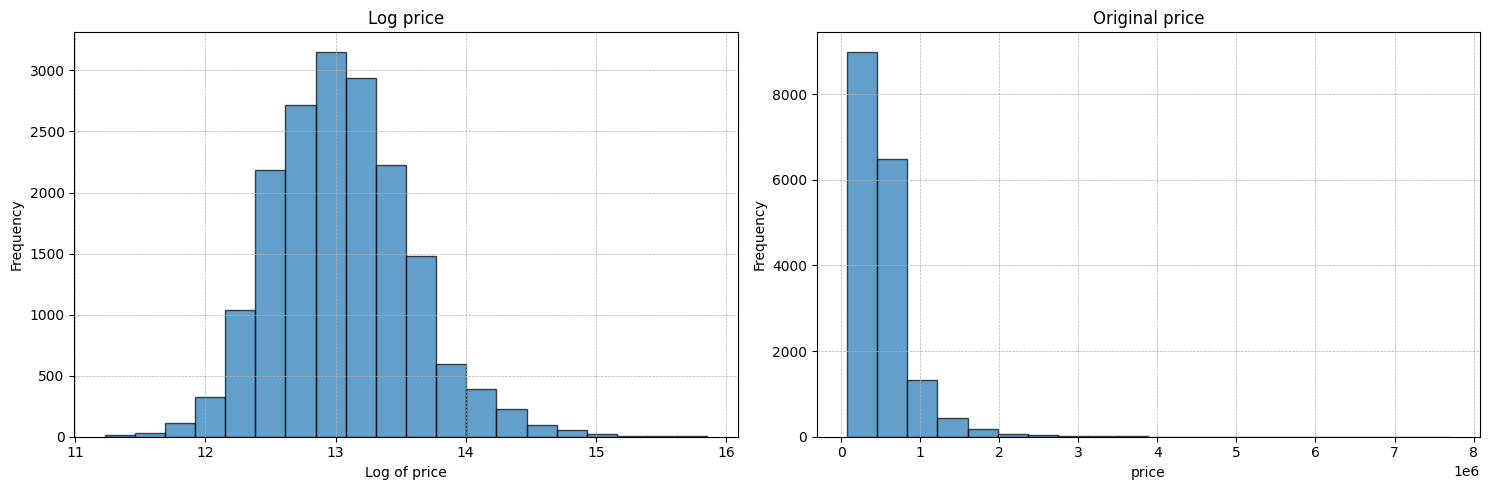

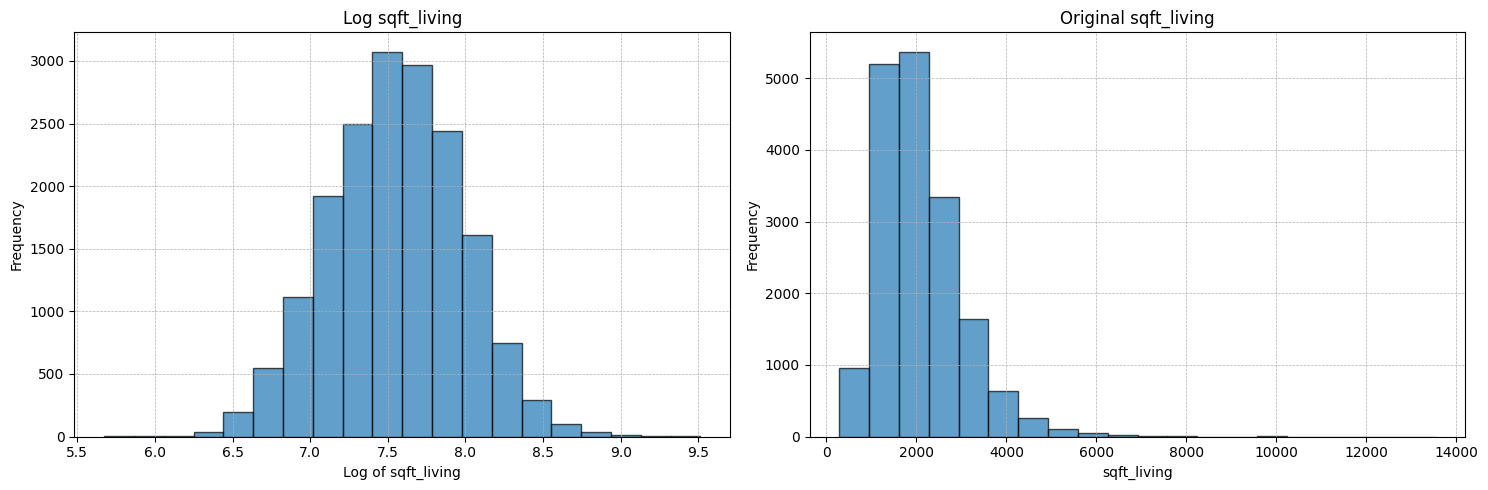

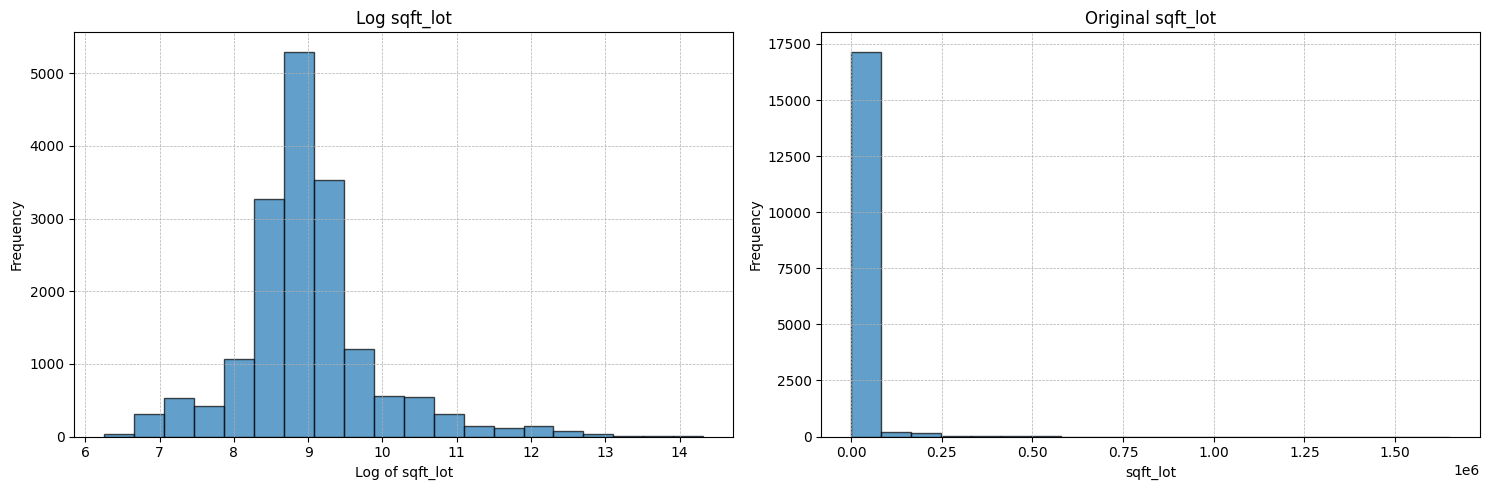

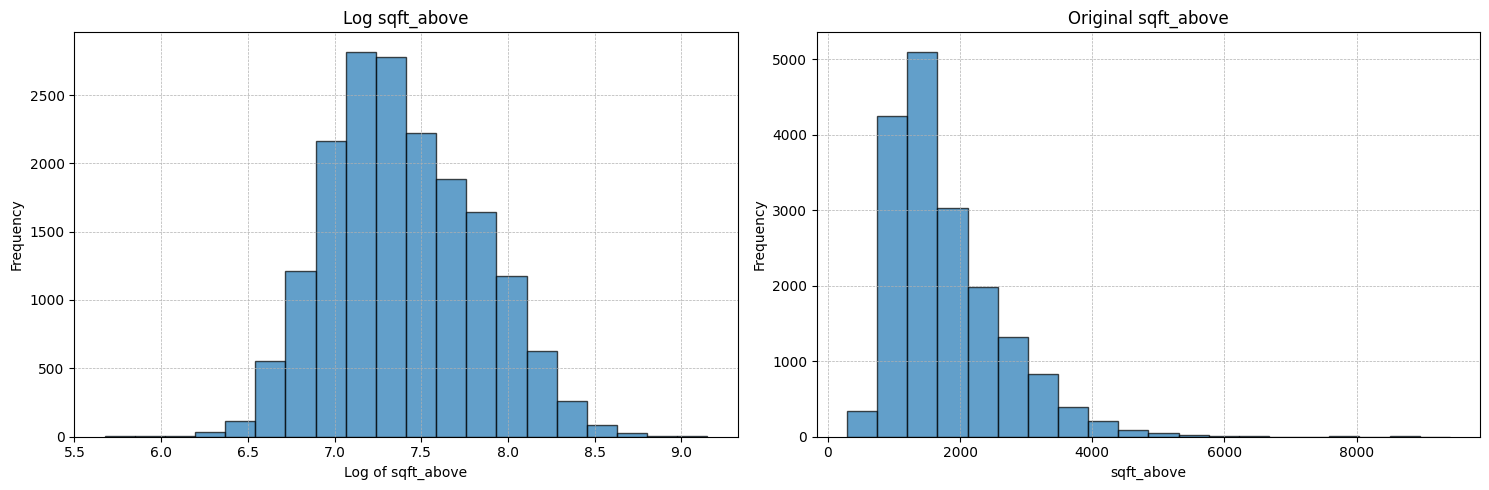

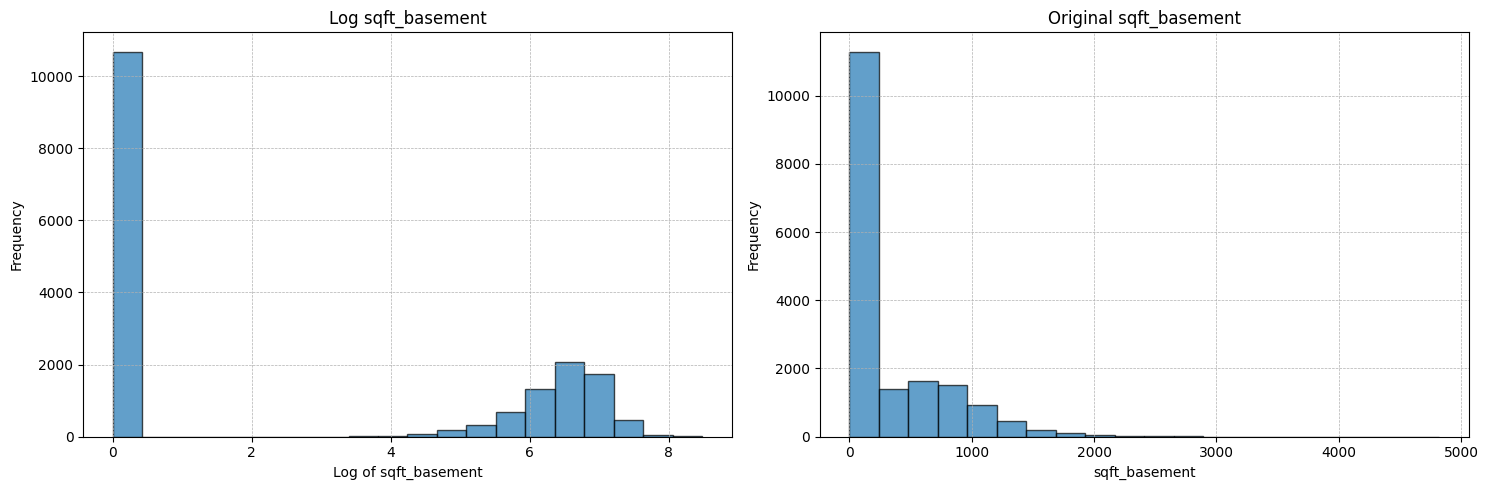

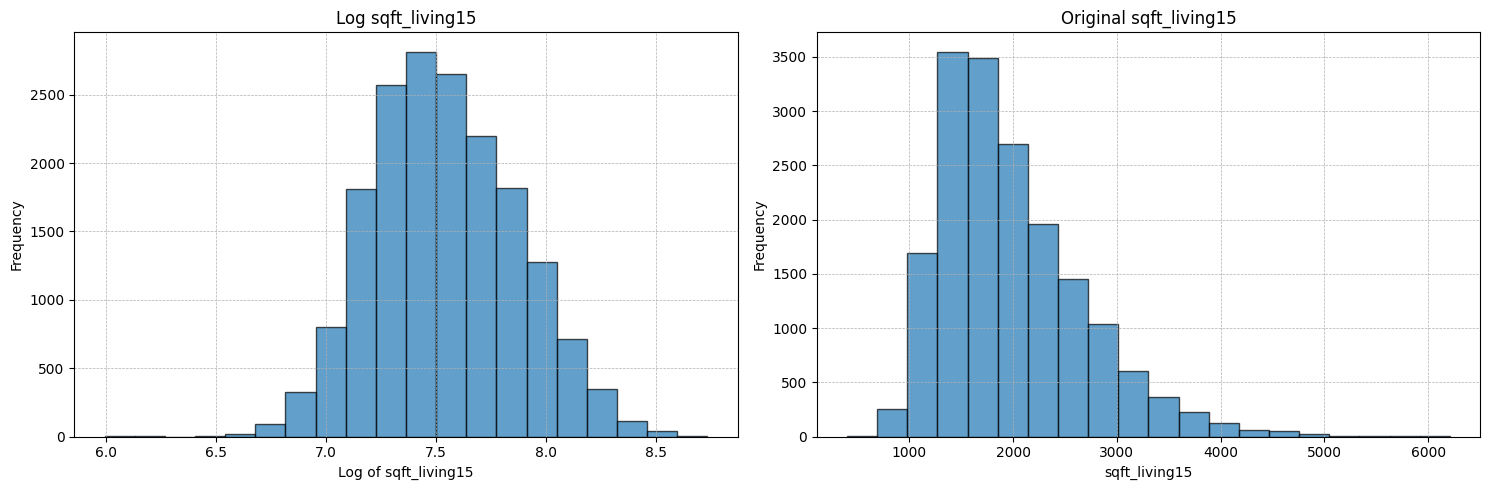

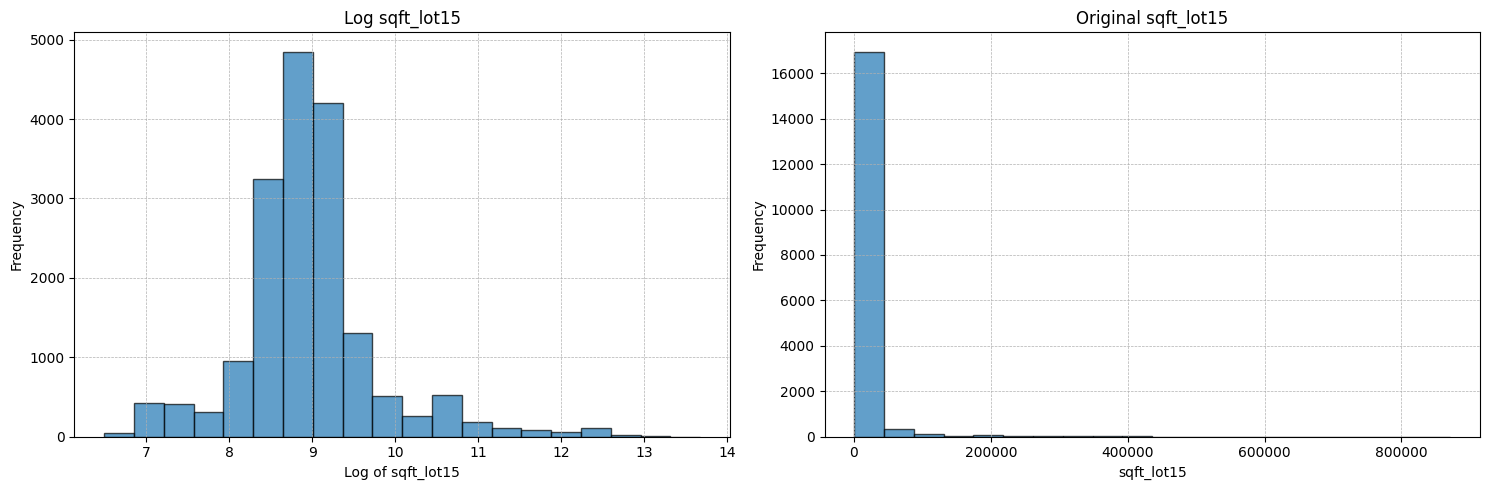

In [ ]:
import matplotlib.pyplot as plt

columns_to_plot = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for col in columns_to_plot:
    plt.figure(figsize=(15, 5))

    # Subplot 1: With log transformation
    plt.subplot(1, 2, 1)
    log_values = np.log1p(data[col])  # Using log1p to handle zero values
    plt.hist(log_values, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel(f'Log of {col}')
    plt.ylabel('Frequency')
    plt.title(f'Log {col}')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Subplot 2: Without log transformation
    plt.subplot(1, 2, 2)
    plt.hist(data[col], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Original {col}')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

1.  variables need log transformation

*   'price'
*   'sqft_living'
*   'sqft_lot'
*   'sqft_above'
*   'sqft_living15'
*   'sqft_lot15


2.  'sqft_basement' should be converted into a boolean variable



In [ ]:
data['log_price'] = np.log(data['price'])
data['log_sqft_living'] = np.log(data['sqft_living'])
data['log_sqft_lot'] = np.log(data['sqft_lot'])
data['log_sqft_above'] = np.log(data['sqft_above'])
data['log_sqft_living15'] = np.log(data['sqft_living15'])
data['log_sqft_lot15'] = np.log(data['sqft_lot15'])

# Convert to boolean
data['has_basement'] = data['sqft_basement'] > 0
data['has_basement'] = data['has_basement'].astype(int)
# Check to see if it worked
data['has_basement'].value_counts()

data.head(10)

id             date    price  bedrooms  bathrooms  sqft_living  \
0  3787000140  20140901T000000   450000         3       2.25         1780   
1  1934800078  20140930T000000   430000         2       2.25         1040   
2  7331900290  20140731T000000   230000         4       1.50         1520   
3  3438500798  20140715T000000   275000         3       1.50         1060   
4  2697400020  20141031T000000   400000         3       2.00         1350   
5  3869900146  20141030T000000   306500         2       1.00          840   
6  1257201130  20141001T000000  1015000         4       2.50         2700   
7  1277000240  20150402T000000   735000         3       2.50         2540   
8   982850060  20140603T000000   400000         3       2.25         1450   
9  3663000070  20140708T000000   600000         3       2.25         1900   

   sqft_lot  floors  waterfront  view  ...  region_Auburn  region_Sammamish  \
0      9969     1.0           0     0  ...              0                 0   
1      1516     2.0           0     0  ...              0                 0   
2      8800     1.0           0     0  ...              1                 0   
3      6954     1.0           0     0  ...              0                 0   
4      7216     1.0           0     0  ...              0                 0   
5       892     2.0           0     0  ...              0                 0   
6      4590     2.0           0     0  ...              0                 0   
7      6762     2.0           0     0  ...              0                 0   
8      4706     2.0           0     0  ...              0                 0   
9     46609     1.5           0     0  ...              0                 0   

   region_FederalWay  log_price  log_sqft_living  log_sqft_lot  \
0                  0  13.017003         7.484369      9.207236   
1                  0  12.971540         6.946976      7.323831   
2                  0  12.345835         7.326466      9.082507   
3                  0  12.524526         6.966024      8.847072   
4                  0  12.899220         7.207860      8.884056   
5                  0  12.632973         6.733402      6.793466   
6                  0  13.830399         7.901007      8.431635   
7                  0  13.507626         7.839919      8.819074   
8                  0  12.899220         7.279319      8.456594   
9                  0  13.304685         7.549609     10.749549   

   log_sqft_above  log_sqft_living15  log_sqft_lot15  has_basement  
0        7.279319           7.575585        8.983942             1  
1        6.946976           7.352441        7.560080             0  
2        7.326466           7.222566        9.082507             0  
3        6.966024           7.352441        8.847072             0  
4        7.207860           7.560080        8.935904             0  
5        6.733402           6.937314        6.914731             0  
6        7.901007           7.640123        8.180321             0  
7        7.839919           7.962067        8.799511             0  
8        7.279319           7.306531        8.448272             0  
9        7.272398           7.807917       10.681895             1  

[10 rows x 45 columns]

After data processing, the number of columns in the database increased from 21 to 45.


In [ ]:
data.shape

(17609, 45)

# **Visualizing data using seaborn**

*   Seaborn: Python library for statistical data visualization built on top of Matplotlib


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold', 'age_built',
       'age_renovated', 'radius', 'angle', 'region', 'region_Seattle',
       'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent',
       'region_Kirkland', 'region_NorthSeattle', 'region_Redmond',
       'region_Auburn', 'region_Sammamish', 'region_FederalWay', 'log_price',
       'log_sqft_living', 'log_sqft_lot', 'log_sqft_above',
       'log_sqft_living15', 'log_sqft_lot15', 'has_basement'],
      dtype='object')

Visualize the relationship between the features and the response using scatterplots.


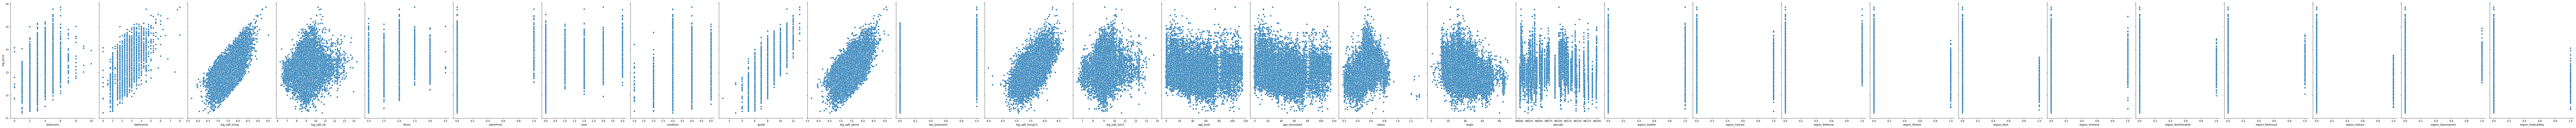

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data, x_vars=['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view',
                           'condition', 'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15',
                           'age_built', 'age_renovated', 'radius', 'angle', 'zipcode', 'region_Seattle', 'region_FarEast',
                           'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland', 'region_NorthSeattle',
                           'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay'],
             y_vars='log_price',size=7, aspect=0.7)


**Positive linear correlation:**


*   'bedrooms'
*   'bathrooms'
*   'log_sqft_living'
*   'grade'
*   'log_sqft_above'
*   'log_sqft_living15'

**Negative linear correlation:**
*   'angle'

**Quadratic relationship:**
*  'bedrooms'
*  'log_sqft_lot'
*  'radius'

**No significant relationship:**
 'floors', 'waterfront', 'view', 'condition', 'has_basement', 'age_built', 'age_renovated', 'log_sqft_lot15', *'log_sqft_lot',  *'angle'*, 'zipcode', 'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland', 'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay'

 **There may be some relationships between these variables and the target variable, but due to the presence of noise, some correlations are not so significant.**


# **Base Model - Fit a base model**

## **Using latitute and longtitude to represent area**

Splitting X and y into training and testing sets

In [ ]:
# Using latitute and longtitude to represent area
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

X1 = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors',
          'waterfront', 'view', 'condition', 'grade', 'log_sqft_above', 'has_basement',
          'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated', 'radius', 'angle']]
y1 = data['log_price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

print(X1_train.shape)
print(X1_test.shape)

(14087, 17)
(3522, 17)


Fit the model to the training data (learn the coefficients)

In [ ]:
# Using latitute and longtitude to represent area
X1_train2 = sm.add_constant(X1_train)
model_train = sm.OLS(y1_train, X1_train2)
lm_base1 = model_train.fit()
print(lm_base1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2961.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:32:36   Log-Likelihood:                -204.70
No. Observations:               14087   AIC:                             445.4
Df Residuals:                   14069   BIC:                             581.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7983      0.07

## **Using zipcode to represent area**

Splitting X and y into training and testing sets

In [ ]:
# Using zipcode to represent area
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

X2 = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]
y2 = data['log_price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

print(X2_train.shape)
print(X2_test.shape)

(14087, 26)
(3522, 26)


Fit the model to the training data (learn the coefficients)

In [ ]:
# Using zipcode to represent area
X2_train2 = sm.add_constant(X2_train)
model_train = sm.OLS(y2_train, X2_train2)
lm_base2 = model_train.fit()
print(lm_base2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2098.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:32:42   Log-Likelihood:                 230.28
No. Observations:               14087   AIC:                            -406.6
Df Residuals:                   14060   BIC:                            -202.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.7573    

## **Accuracy metrics for regression**

> Calculate R2 and MSE

> Compare two base models







In [ ]:
# Using latitute and longtitude to represent area
from sklearn.metrics import r2_score
from sklearn import metrics

X1_test2 = sm.add_constant(X1_test)
y1_test_pred = lm_base1.predict(X1_test2)

y1_train_pred = lm_base1.predict(X1_train2)

print("R2_test:", r2_score(y1_test, y1_test_pred))
print("R2_train:", r2_score(y1_train, y1_train_pred))

print("MSE_test:", metrics.mean_squared_error(y1_test, y1_test_pred))
print("MSE_train:",metrics.mean_squared_error(y1_train, y1_train_pred))

R2_test: 0.7708600005427797
R2_train: 0.7815800344755401
MSE_test: 0.06499943445065429
MSE_train: 0.060276375565109896


In [ ]:
# Using zipcode to represent area
from sklearn.metrics import r2_score
from sklearn import metrics

X2_test2 = sm.add_constant(X2_test)
y2_test_pred = lm_base2.predict(X2_test2)

y2_train_pred = lm_base2.predict(X2_train2)

print("R2_test:", r2_score(y2_test, y2_test_pred))
print("R2_train:", r2_score(y2_train, y2_train_pred))

print("MSE_test:", metrics.mean_squared_error(y2_test, y2_test_pred))
print("MSE_train:",metrics.mean_squared_error(y2_train, y2_train_pred))

R2_test: 0.7940220984467363
R2_train: 0.7951013423371207
MSE_test: 0.05792173835397898
MSE_train: 0.05666658636637991


**Conclusion:**


1) Compared with base model one, **base model two** has higher R2 and lower error, so we choose the second model as our base model

**base model 1:**

R2_test: 0.7708600005427797

MSE_test: 0.06499943445065429

**base model 2:**

R2_test: 0.7940220984467363

MSE_test: 0.05792173835397898

2) **MSE_test is very close to MSE_train**, indicating that this model is not complex enough to capture enough information from this dataset (**underfitting**)

## Check the base model

*   to find violations of statistical assumptions




### **1) Autocorrelation**

***If Durbin-Watson = 2, no autocorrelation (DW=2.014)***

If 0< Durbin-Watson < 2, Positive correlation between residuals

If 2< Durbin-Watson < 4, Negative correlation between residuals

### **2) Linearity and additivity**

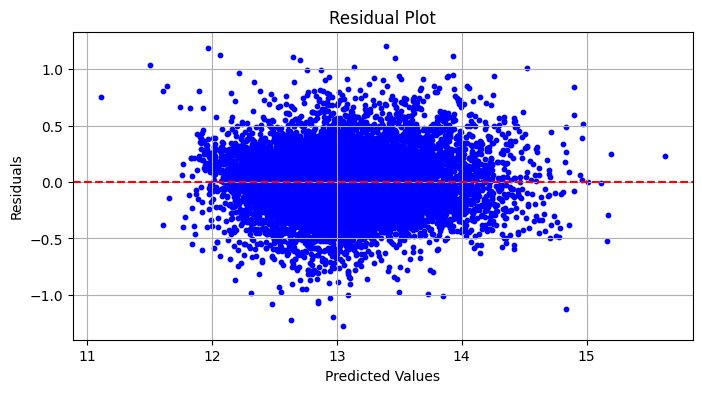

In [ ]:
import matplotlib.pyplot as plt

residuals = lm_base2.resid

plt.figure(figsize=(8, 4))
plt.scatter(y2_train_pred, residuals, c='b', s=10)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

**Satisfy Linearity requirement:**

The scatter in the plot should be roughly symmetric and evenly distributed around the line y=0, with no significant distribution trends.

There are some points in the plot that are significantly far from the other data points. These points are likely **outliers**.


**Solution:** remove outliers in the following steps.

### **3) Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = X2_train2.columns
vif["VIF"] = [variance_inflation_factor(X2_train2.values, i) for i in range(X2_train2.shape[1])]

print(vif)

                Feature          VIF
0                 const  1352.862504
1              bedrooms     1.887664
2             bathrooms     3.343807
3       log_sqft_living    19.675683
4          log_sqft_lot     6.889457
5                floors     2.540729
6            waterfront     1.196730
7                  view     1.395736
8             condition     1.270400
9                 grade     3.355319
10       log_sqft_above    19.623566
11         has_basement     4.572846
12    log_sqft_living15     2.967304
13       log_sqft_lot15     6.650245
14            age_built     6.752444
15        age_renovated     6.884949
16       region_Seattle     2.930305
17       region_FarEast     1.372517
18      region_Bellevue     1.423842
19        region_Renton     1.289568
20          region_Kent     1.297020
21      region_Kirkland     1.242486
22  region_NorthSeattle     1.265135
23       region_Redmond     1.275403
24        region_Auburn     1.214843
25     region_Sammamish     1.266604
2

If VIF < 3, variables do not exhibit multicollinearity.
If VIF > 10, the multicollinearity issue is quite severe.

**Problem:** multicollinearity exists.

**Solution:** feature selection

### **4) Residuals distribution**

Residuals should follow a normal distribution

In [ ]:
residuals = lm_base2.resid
residuals.shape

(14087,)

In [ ]:
z, p = stats.normaltest(residuals.values)
print("z-value:", z)
print("p-value:", p)

z-value: 509.9834292213696
p-value: 1.813449280584331e-111


p-value is very very small, so we should **reject the null hypothesis**, indicating that the residuals do not follow a normal distribution

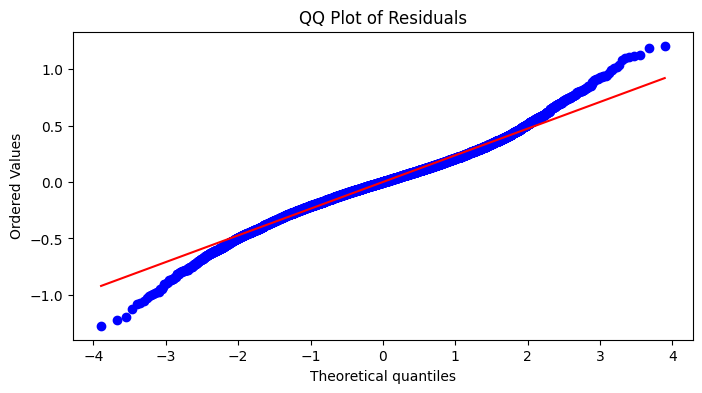

In [ ]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(figsize=(8, 4))
stats.probplot(residuals, dist="norm", plot=plt)

ax.set_title('QQ Plot of Residuals')

plt.show()

# If the residuals in the QQ plot form a diagonal line at a 45-degree angle, it indicates that the data follows a normal distribution.

**Problem:** Residuals do not follow a normal distribution

**Solution:** Generalized Linear Model

### **5) Heteroscedasticity**

In [ ]:
from statsmodels.stats.diagnostic import het_white

residuals = lm_base2.resid
white_test = het_white(residuals, X2_train2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])

Lagrange Multiplier Statistic: 2311.4252033800294
p-value: 1.3698423777018881e-304
F-statistic: 8.869081024079282
F-p-value: 0.0


**Problem:** p-value is very very small, indicating significant heteroscedasticity

**Solution:** Weighted Least Squares


# Model A - Feature selection




In [ ]:
# Choose the base model2 as our final base model

X = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]
y = data['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train2 = sm.add_constant(X_train)
model_train = sm.OLS(y_train, X_train2)
lm_base = model_train.fit()

X.shape

(17609, 26)

##**Method1: Forward stepwise selection**


In [ ]:
feature_list = ['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']
len(feature_list)

26

In [ ]:
from sklearn.linear_model import LinearRegression

def compute_best_model_mse(remaining_features, selected_features, x_train, y_train):
    max_r2 = 0
    max_feature = None
    for feature_name in remaining_features:
        train_features = selected_features + [feature_name]
        X_fs = X_train[train_features]
        y_fs = y_train
        X_fs2 = sm.add_constant(X_fs)
        linreg = sm.OLS(y_fs, X_fs2)
        model = linreg.fit()
        y_fs_pred = model.predict(X_fs2)
        r2 = r2_score(y_fs, y_fs_pred)
        if r2 > max_r2:
            max_r2 = r2
            max_feature = feature_name

    from sklearn.linear_model import LinearRegression
    X_fs = X_train[selected_features + [max_feature]]
    X_fs = sm.add_constant(X_fs)
    lm = LinearRegression()
    scores = -cross_val_score(lm, X_fs, y_fs, cv=5, scoring='neg_mean_squared_error')

    return scores.mean(), max_feature


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics

remaining_features = feature_list.copy()
selected_features = []

best_mse_score = float('inf')
best_features = None

while remaining_features:
  print(f"number of remaining features: {len(remaining_features)}")
  mse_scores, max_feature = compute_best_model_mse(remaining_features, selected_features, X_train, y_train)
  print(f"Mean MSE: {mse_scores} (Feature: {max_feature})")

  remaining_features.remove(max_feature)
  selected_features.append(max_feature)
  if mse_scores < best_mse_score:
    best_mse_score = mse_scores
    best_features = selected_features

  print(f"selected_features: {selected_features}")

print(f"best MSE: {best_mse_score}, best_features={best_features}")
print("numbers of features in the best model: ", len(best_features))


number of remaining features: 26
Mean MSE: 0.13974003456759232 (Feature: grade)
selected_features: ['grade']
number of remaining features: 25
Mean MSE: 0.12039290994583292 (Feature: age_built)
selected_features: ['grade', 'age_built']
number of remaining features: 24
Mean MSE: 0.10548927005976576 (Feature: log_sqft_living)
selected_features: ['grade', 'age_built', 'log_sqft_living']
number of remaining features: 23
Mean MSE: 0.09504367508536901 (Feature: region_Seattle)
selected_features: ['grade', 'age_built', 'log_sqft_living', 'region_Seattle']
number of remaining features: 22
Mean MSE: 0.08766236336082786 (Feature: region_Bellevue)
selected_features: ['grade', 'age_built', 'log_sqft_living', 'region_Seattle', 'region_Bellevue']
number of remaining features: 21
Mean MSE: 0.08318601616507866 (Feature: region_FederalWay)
selected_features: ['grade', 'age_built', 'log_sqft_living', 'region_Seattle', 'region_Bellevue', 'region_FederalWay']
number of remaining features: 20
Mean MSE: 0.07

To some degree, this result can make sense because the test error and the train error is very close in this base model, indicating we should add more features instead of reduing.

##**Method2: Backward stepwise selection**

In [ ]:
feature_list = ['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']
len(feature_list)

26

In [ ]:
from sklearn.linear_model import LinearRegression

def compute_best_backward(removed_features, x_train, y_train):

    max_r2 = 0
    max_feature = None
    selected_features=removed_features.copy()

    for feature_name in removed_features:
        selected_features.remove(feature_name)
        X_fs = X_train[selected_features]
        y_fs = y_train
        X_fs2 = sm.add_constant(X_fs)
        linreg = sm.OLS(y_fs, X_fs2)
        model = linreg.fit()
        y_fs_pred = model.predict(X_fs2)
        r2 = r2_score(y_fs, y_fs_pred)
        if r2 > max_r2:
            max_r2 = r2
            max_feature = feature_name
        selected_features.append(feature_name)

    selected_features.remove(max_feature)
    X_fs = X_train[selected_features]
    X_fs = sm.add_constant(X_fs)
    lm = LinearRegression()
    scores = -cross_val_score(lm, X_fs, y_fs, cv=5, scoring='neg_mean_squared_error')

    return scores.mean(), max_feature


In [ ]:
best_mse_score = float('inf')
removed_features = feature_list.copy()
best_features = feature_list.copy()


while len(removed_features) > 1:
  print(f"number of removed_features: {len(removed_features)}")
  mse_scores, max_feature = compute_best_backward(removed_features, X_train, y_train)
  print(f"Mean MSE: {mse_scores} (Feature: {max_feature})")
  removed_features.remove(max_feature)

  if mse_scores < best_mse_score:
    best_mse_score = mse_scores
    best_features = removed_features.copy()

# Calculate the cross-validation MSE individually when no variable is deleted,
# and compare it with the previous best_mse_score
X_train2 = sm.add_constant(X_train)
model_train2 = LinearRegression()
scores_full_features = -cross_val_score(model_train2, X_train2, y_train, cv=5, scoring='neg_mean_squared_error')

if scores_full_features.mean() < best_mse_score:
    best_mse_score = scores_full_features.mean()
    best_features = feature_list.copy()

print(f"best MSE: {best_mse_score}, best_features={best_features}")
print("numbers of features in the best model: ", len(best_features))


number of removed_features: 26
Mean MSE: 0.057365946990872975 (Feature: floors)
number of removed_features: 25
Mean MSE: 0.057483091674871686 (Feature: log_sqft_lot15)
number of removed_features: 24
Mean MSE: 0.057499154644045904 (Feature: log_sqft_lot)
number of removed_features: 23
Mean MSE: 0.05769151925789014 (Feature: bedrooms)
number of removed_features: 22
Mean MSE: 0.05781727464198325 (Feature: log_sqft_living)
number of removed_features: 21
Mean MSE: 0.05804672266942297 (Feature: age_renovated)
number of removed_features: 20
Mean MSE: 0.05837772218569699 (Feature: region_Renton)
number of removed_features: 19
Mean MSE: 0.059079982483698466 (Feature: bathrooms)
number of removed_features: 18
Mean MSE: 0.05980378906045357 (Feature: region_NorthSeattle)
number of removed_features: 17
Mean MSE: 0.06052771178298526 (Feature: view)
number of removed_features: 16
Mean MSE: 0.061453171152419994 (Feature: region_Sammamish)
number of removed_features: 15
Mean MSE: 0.062257761943580056 (

After using forward and backward stepwise selection, we couldn't remove any feature, but there is a multicollinearity problem in this model. **Therefore, we checked the correlation coefficient among features.**

##**Method3: Remove highly correlated variables**



###Prepare data

In [ ]:
merged_data = pd.concat([X_train, y_train], axis=1)
merged_data.shape

(14087, 27)

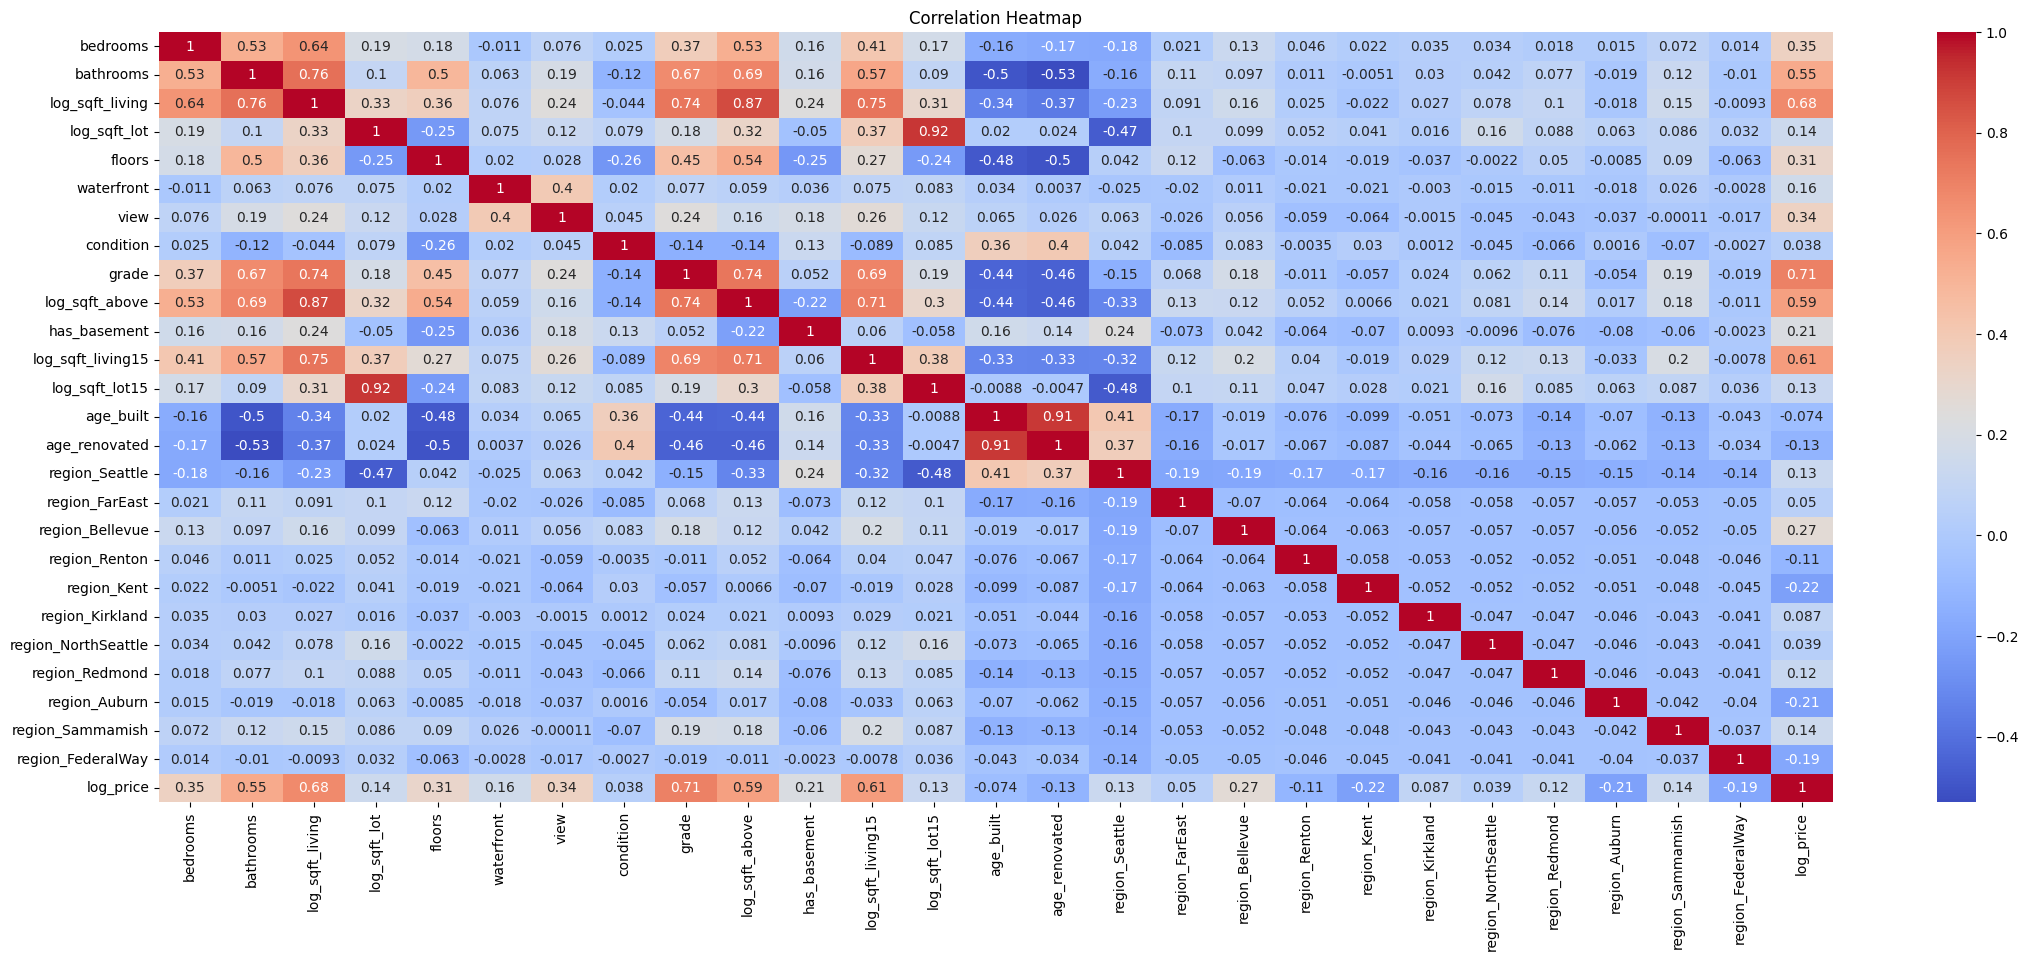

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(27, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Among variable pairs with a correlation coefficient **exceeding 0.8**, remove one of them:

log_sqft_above & log_sqft_living  0.87

> **log_sqft_above** & log_price 0.59

> log_sqft_living & log_price 0.67


log_sqft_lot15 & log_sqft_lot  0.92

> **log_sqft_lot15** & log_price 0.13

> log_sqft_lot & log_price 0.14

age_built & age_renovated  0.92

> **age_built** & log_price -0.081

> age_renovated & log_price -0.13

###Fit a model on the train data

In [ ]:
# delete 3 features: log_sqft_above, log_sqft_lot15, and age_built

# prepare data
X = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_living15', 'age_renovated', 'has_basement',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]
y = data['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.shape

(17609, 23)

In [ ]:
X_train2 = sm.add_constant(X_train)
model_train = sm.OLS(y_train, X_train2)
ModelA_correlation = model_train.fit()
print(ModelA_correlation.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     2257.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:38:06   Log-Likelihood:                -83.964
No. Observations:               14087   AIC:                             215.9
Df Residuals:                   14063   BIC:                             397.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.7936    

###Check the model

In [ ]:
# Check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = X_train2.columns
vif["VIF"] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]

print(vif)

                Feature          VIF
0                 const  1301.484101
1              bedrooms     1.893613
2             bathrooms     3.336865
3       log_sqft_living     5.950674
4          log_sqft_lot     1.862903
5                floors     2.308692
6            waterfront     1.192266
7                  view     1.382899
8             condition     1.249988
9                 grade     3.206812
10    log_sqft_living15     2.965924
11        age_renovated     2.395793
12         has_basement     1.625535
13       region_Seattle     2.788363
14       region_FarEast     1.363994
15      region_Bellevue     1.408669
16        region_Renton     1.280040
17          region_Kent     1.277675
18      region_Kirkland     1.244203
19  region_NorthSeattle     1.258233
20       region_Redmond     1.259581
21        region_Auburn     1.212786
22     region_Sammamish     1.269367
23    region_FederalWay     1.171904


All of features' VIF are less than 5.

In [ ]:
# Check residuals should follow a normal distribution

residuals = ModelA_correlation.resid
z, p = stats.normaltest(residuals.values)
print("z-value:", z)
print("p-value:", p)

z-value: 464.2673724141509
p-value: 1.533278395745067e-101


In [ ]:
# Use GLM to solve residual distribution problem

import numpy as np
import statsmodels.api as sm

residuals = ModelA_correlation.resid

# Weighting Method One
# weights = np.random.rand(len(y))

# # Weighting Method Two
# weights = np.random.rand(len(y))
# weights = 1 / (weights ** 2)

# Weighting Method Three
weights = 1/ abs(residuals)

# Weighting Method Four
# weights = 1 / (residuals.var())

gls_model = sm.GLS(y_train, X_train2, weights)
ModelA_GLM = gls_model.fit()

print(ModelA_GLM.summary())

                            GLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.658
Model:                            GLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1178.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:34:31   Log-Likelihood:                -9693.9
No. Observations:               14087   AIC:                         1.944e+04
Df Residuals:                   14063   BIC:                         1.962e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.1391    

In [ ]:
# Check residuals should follow a normal distribution

residuals = ModelA_GLM.resid
z, p = stats.normaltest(residuals.values)
print("z-value:", z)
print("p-value:", p)

z-value: 224.71569122038318
p-value: 1.5981136205168853e-49


**Conclusion**:

The degree of fit has decreased(R2 from 0,787 to 0,658), and there is still an issue with the residual distribution not being normal.

this method doesn't work.

**Remove Outliers or non-parametric statistical methods(such as decision trees, random forests) may be the solution.**

In [ ]:
# Check Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

residuals = ModelA_correlation.resid

white_test = het_white(residuals, X_train2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])


Lagrange Multiplier Statistic: 2172.6140060909997
p-value: 0.0
F-statistic: 11.083492174848818
F-p-value: 0.0


In [ ]:
# Using the WLS to solve the Heteroscedasticity

import numpy as np
import statsmodels.api as sm

residuals = ModelA_correlation.resid

# Weighting Method One
# weights = np.random.rand(len(y))

# # Weighting Method Two
# weights = np.random.rand(len(y))
# weights = 1 / (weights ** 2)

# Weighting Method Three
weights = 1/ abs(residuals)

# Weighting Method Four
# weights = 1 / (residuals.var())

X_train2 = sm.add_constant(X_train)
model = sm.WLS(y_train, X_train2, weights)
ModelA_WLS = model.fit()
print(ModelA_WLS.summary())

                            WLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.980
Model:                            WLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.933e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:34:38   Log-Likelihood:                 7339.1
No. Observations:               14087   AIC:                        -1.463e+04
Df Residuals:                   14063   BIC:                        -1.445e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.7751    

In [ ]:
# Check Heteroscedasticity

from statsmodels.stats.diagnostic import het_white

residuals = ModelA_WLS.resid

white_test = het_white(residuals, X_train2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])

Lagrange Multiplier Statistic: 2185.2377226166486
p-value: 0.0
F-statistic: 11.159715610619404
F-p-value: 0.0


**Conclusion**:

Good news: the degree of fit has increased(R2 from 0,787 to 0,980)

Bad news: Heteroscedasticity problem still exits.

**Remove Outliers or Creat non-linear models may be the solutions.**

###**Make predictions and measure accuracy**

In [ ]:
# using ModelA_correlation
X_test2 = sm.add_constant(X_test)
y_test_pred1 = ModelA_correlation.predict(X_test2)
y_test_pred1

924      12.865097
3575     13.369326
7923     12.720754
7267     12.961580
1131     14.067729
           ...    
8039     12.451467
931      12.941146
6790     13.331586
12354    13.698349
7611     12.660478
Length: 3522, dtype: float64

In [ ]:
# using ModelA_WLS

X_test2 = sm.add_constant(X_test)
y_test_pred2 = ModelA_WLS.predict(X_test2)
y_test_pred2

924      12.868649
3575     13.369825
7923     12.721394
7267     12.972523
1131     14.076218
           ...    
8039     12.446887
931      12.944205
6790     13.331872
12354    13.690235
7611     12.646340
Length: 3522, dtype: float64

In [ ]:
# measure accuracy of ModelA_correlation on test data

from sklearn.metrics import r2_score
from sklearn import metrics

print("R2_test:", r2_score(y_test, y_test_pred1))
print("MSE_test:", metrics.mean_squared_error(y_test, y_test_pred1))

R2_test: 0.7852509393843763
MSE_test: 0.05919090279052327


In [ ]:
# measure accuracy of ModelA_WLS on test data

from sklearn.metrics import r2_score
from sklearn import metrics

print("R2_test:", r2_score(y_test, y_test_pred2))
print("MSE_test:", metrics.mean_squared_error(y_test, y_test_pred2))

R2_test: 0.7857852072528146
MSE_test: 0.05904364348529428


There is so significant difference between these two models.

##Conclusion

After using forward and backward stepwise selection, we couldn't remove any feature, but there is a multicollinearity problem in this model. Therefore, we checked the correlation coefficient among features, and delete 3 features, and get a model called "**ModleA_correlation**".

Next, we use the WLS regression to solve heteroscedasticity and use GML to solve residual distribution issue. **Both don't work**. Maybe **Remove Outliers or Creat non-linear models or non-parametric statistical methods**(such as decision trees, random forests) coulb be the solutions.

However, there is a fit degree increase on the train dats when using **GLS regression(R2 from 0,787 to 0,980)**, so we compare two models(ModleA_correlation, ModleA_GLS) prediction ability using the test data.

There is so significant difference between these two models.

**Next, we will remove outliers and use non-linear regression to improve the ModleA_correlation.**

# Model B - Remove outliers

## Prepare data

In [ ]:
# original data of Model A
X = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'has_basement', 'log_sqft_living15', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]

y = data['log_price']

X.shape

(17609, 23)

In [ ]:
import numpy as np

def remove_outliers(df, target):
    q25 = np.quantile(target, .25)
    q75 = np.quantile(target, .75)
    IQR = q75 - q25
    outliers = df.loc[((target < (q25 - 1.5 * IQR)) | (target > (q75 + 1.5 * IQR)))].index
    df_filtered = df.drop(index=outliers)
    target_filtered = target.drop(index=outliers)
    return df_filtered, target_filtered

# Filtering the data
X_filtered, y_filtered = remove_outliers(X, y)

# Check the shape of the filtered data
X_filtered.shape, y_filtered.shape

((17347, 23), (17347,))

Verify the functioning of the remove_outliers() method.

In [ ]:
# Filter Checking
q25_original = np.quantile(y, .25)
q75_original = np.quantile(y, .75)
IQR_original = q75_original - q25_original

# Calculate the expected min and max values after removing outliers from the original data
expected_min = q25_original - 1.5 * IQR_original
expected_max = q75_original + 1.5 * IQR_original

min_filtered = y_filtered.min()
max_filtered = y_filtered.max()

# Check if the filtered data's min and max are within the expected range after outlier removal
result_check = (min_filtered >= expected_min) and (max_filtered <= expected_max)

result_check

True

## Fit a Model with filtered data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = train_test_split(X_filtered, y_filtered, test_size=0.2)

X_train_outlier_2 = sm.add_constant(X_train_outlier)
model_train = sm.OLS(y_train_outlier, X_train_outlier_2)
model_outlier = model_train.fit()
print(model_outlier .summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2028.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:36:48   Log-Likelihood:                 429.10
No. Observations:               13877   AIC:                            -810.2
Df Residuals:                   13853   BIC:                            -629.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.8561    

## Check the model

In [ ]:
# Check residuals should follow a normal distribution

residuals = model_outlier.resid
z, p = stats.normaltest(residuals.values)
print("z-value:", z)
print("p-value:", p)

z-value: 463.3630374023292
p-value: 2.4098769575338292e-101


In [ ]:
# Use GLM to solve residual distribution problem

import numpy as np
import statsmodels.api as sm

residuals = model_outlier.resid

weights = 1/ abs(residuals)

gls_model_outlier = sm.GLS(y_train_outlier,  X_train_outlier_2, weights)
Model_GLM_OUTLIER = gls_model_outlier.fit()

print(Model_GLM_OUTLIER.summary())

                            GLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.601
Model:                            GLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     905.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:37:07   Log-Likelihood:                -9149.8
No. Observations:               13877   AIC:                         1.835e+04
Df Residuals:                   13853   BIC:                         1.853e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.3589    

In [ ]:
# Check residuals should follow a normal distribution

residuals = Model_GLM_OUTLIER.resid
z, p = stats.normaltest(residuals.values)
print("z-value:", z)
print("p-value:", p)

z-value: 281.6401177586627
p-value: 6.960260392064742e-62


**Conclusion:**

The degree of fit has decreased(R2 from 0.771 to 0.601), and there is still an issue with the residual distribution not being normal.

this method doesn't work.

In [ ]:
# Check Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

residuals = model_outlier.resid

white_test = het_white(residuals, X_train_outlier_2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])

Lagrange Multiplier Statistic: 1833.0136436624443
p-value: 3.0648953793816817e-249
F-statistic: 9.192204020309257
F-p-value: 1.5887290856481168e-271


In [ ]:
# Using the WLS to solve the Heteroscedasticity

import numpy as np
import statsmodels.api as sm

residuals = model_outlier.resid

weights = 1/ abs(residuals)

X_train_outlier_2 = sm.add_constant(X_train_outlier)
model = sm.WLS(y_train_outlier, X_train_outlier_2, weights)
Model_WLS_OUTLIER = model.fit()
print(Model_WLS_OUTLIER.summary())

                            WLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.990
Model:                            WLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.981e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:37:15   Log-Likelihood:                 7757.4
No. Observations:               13877   AIC:                        -1.547e+04
Df Residuals:                   13853   BIC:                        -1.529e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.8737    

In [ ]:
# Check Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

residuals = Model_WLS_OUTLIER.resid

white_test = het_white(residuals, X_train_outlier_2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])

Lagrange Multiplier Statistic: 1840.547926803018
p-value: 1.1210904198895156e-250
F-statistic: 9.235764533927615
F-p-value: 3.511837924108485e-273


Conclusion:

Good news: the degree of fit has increased(R2 from 0.771 to 0.990)

Bad news: Heteroscedasticity problem still exits.

## Make predications and measure accuracy

In [ ]:
# using model_outlier
X_test2 = sm.add_constant(X_test_outlier)
y_test_pred1 = model_outlier.predict(X_test2)
y_test_pred1

10758    13.140381
2608     12.827692
8952     12.992221
10789    12.349878
11412    12.638459
           ...    
3666     13.296342
15891    12.927512
9086     13.640123
731      13.067348
226      13.661112
Length: 3470, dtype: float64

In [ ]:
# using Model_WLS_OUTLIER

X_test2 = sm.add_constant(X_test_outlier)
y_test_pred2 = Model_WLS_OUTLIER.predict(X_test2)
y_test_pred2

10758    13.143575
2608     12.828173
8952     12.992076
10789    12.346639
11412    12.643302
           ...    
3666     13.299693
15891    12.930402
9086     13.632713
731      13.070668
226      13.662214
Length: 3470, dtype: float64

In [ ]:
# measure accuracy of model_outlier on test data

from sklearn.metrics import r2_score
from sklearn import metrics

print("R2_test:", r2_score(y_test_outlier, y_test_pred1))
print("MSE_test:", metrics.mean_squared_error(y_test_outlier, y_test_pred1))

R2_test: 0.7611500665808576
MSE_test: 0.056431790799532304


In [ ]:
# measure accuracy of Model_WLS_OUTLIER on test data

from sklearn.metrics import r2_score
from sklearn import metrics

print("R2_test:", r2_score(y_test_outlier, y_test_pred2))
print("MSE_test:", metrics.mean_squared_error(y_test_outlier, y_test_pred2))

R2_test: 0.7609629308030477
MSE_test: 0.05647600436456582


There is so significant difference between these two models.

##Conclusion
We removed the outliers from our data, and use WLS regression to solve the heteroscedasticity and use GML to solve residual distribution issue. **Both don't work**. Maybe creat non-linear models or non-parametric statistical methods(such as decision trees, random forests) coulb be the solutions.

When contrasted with model_correlation, the performance of the **the modele_correlation is slightly better** than the model_outlier!

**the modele_correlation(Model A):**

R2_test: 0.7852509393843763

MSE_test: 0.05919090279052327

**the model_outlier(Model B)**

R2_test: 0.7611500665808576

MSE_test: 0.05643179079953230

**(Model A > Model B): similar MSE but slightly higher R2**

This result is resonable because the original model is underfitting. It's better to have larger sample size instead of deleting obversations.

**Next, we will use non-linear regression.**

# Model C - Quadratic

##Prepare data

**Quadratic relationship:**


*  'bedrooms'
*  'log_sqft_lot'


**No significant relationship:**
 'floors', 'waterfront', 'view', 'condition', 'has_basement', 'age_renovated', 'log_sqft_lot'

In [ ]:
# original data of Model A
X = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'has_basement', 'log_sqft_living15', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]

y = data['log_price']

X.shape

(17609, 23)

In [ ]:
# Quadratic relationship: bedrooms', 'log_sqft_lot','floors', 'waterfront', 'view', 'condition', 'has_basement', 'age_renovated'

# prepare data
data['bedrooms^2'] = np.square(data['bedrooms'])
data['log_sqft_lot^2'] = np.square(data['log_sqft_lot'])
data['floors^2'] = np.square(data['floors'])
data['waterfront^2'] = np.square(data['waterfront'])
data['view^2'] = np.square(data['view'])
data['condition^2'] = np.square(data['condition'])
data['has_basement^2'] = np.square(data['has_basement'])
data['age_renovated^2'] = np.square(data['age_renovated'])

data.head()

id             date   price  bedrooms  bathrooms  sqft_living  \
0  3787000140  20140901T000000  450000         3       2.25         1780   
1  1934800078  20140930T000000  430000         2       2.25         1040   
2  7331900290  20140731T000000  230000         4       1.50         1520   
3  3438500798  20140715T000000  275000         3       1.50         1060   
4  2697400020  20141031T000000  400000         3       2.00         1350   

   sqft_lot  floors  waterfront  view  ...  log_sqft_lot15  has_basement  \
0      9969     1.0           0     0  ...        8.983942             1   
1      1516     2.0           0     0  ...        7.560080             0   
2      8800     1.0           0     0  ...        9.082507             0   
3      6954     1.0           0     0  ...        8.847072             0   
4      7216     1.0           0     0  ...        8.935904             0   

   bedrooms^2  log_sqft_lot^2  floors^2  waterfront^2  view^2  condition^2  \
0           9       84.773187       1.0             0       0            9   
1           4       53.638494       4.0             0       0            9   
2          16       82.491933       1.0             0       0           16   
3           9       78.270689       1.0             0       0           16   
4           9       78.926452       1.0             0       0            9   

   has_basement^2  age_renovated^2  
0               1              841  
1               0               36  
2               0             2916  
3               0              961  
4               0             2500  

[5 rows x 53 columns]

##Fit a model on the train data

In [ ]:
X = data[['bedrooms^2', 'log_sqft_lot^2', 'floors^2', 'waterfront^2', 'view^2', 'condition^2', 'has_basement^2', 'age_renovated^2',
          'bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'has_basement', 'log_sqft_living15', 'age_renovated', 'region_Seattle', 'region_FarEast', 'region_Bellevue',
          'region_Renton', 'region_Kent', 'region_Kirkland', 'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish',
          'region_FederalWay']]

y = data['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train2 = sm.add_constant(X_train)
model_train = sm.OLS(y_train, X_train2)
Model_Qua1 = model_train.fit()
print(Model_Qua1.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1850.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:43:52   Log-Likelihood:                 133.90
No. Observations:               14087   AIC:                            -207.8
Df Residuals:                   14057   BIC:                             18.79
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.9116    

**Remove insignificant features**

In [ ]:
X = data[['bedrooms^2', 'waterfront^2', 'age_renovated^2',
          'bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_living15', 'age_renovated', 'region_Seattle', 'region_FarEast', 'region_Bellevue',
          'region_Renton', 'region_Kent', 'region_Kirkland', 'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish',
          'region_FederalWay']]

y = data['log_price']

X.shape


(17609, 24)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

X_train2 = sm.add_constant(X_train)
model_train = sm.OLS(y_train, X_train2)
Model_Qua2 = model_train.fit()
print(Model_Qua2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     2314.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:44:14   Log-Likelihood:                 119.61
No. Observations:               14087   AIC:                            -191.2
Df Residuals:                   14063   BIC:                            -9.951
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.8987    

##Check the model

we use non-linear model mainly to solve the heteroscedasticity issue, So we will check this in the following step.

In [ ]:
# Check Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

residuals = Model_Qua2.resid

white_test = het_white(residuals, X_train2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])


Lagrange Multiplier Statistic: 2272.1333740240552
p-value: 0.0
F-statistic: 11.793963749348505
F-p-value: 0.0


In [ ]:
# Using the WLS to solve the Heteroscedasticity

import numpy as np
import statsmodels.api as sm

residuals = Model_Qua2.resid

# Weighting Method One
# weights = np.random.rand(len(y))

# # Weighting Method Two
# weights = np.random.rand(len(y))
# weights = 1 / (weights ** 2)

# Weighting Method Three
weights = 1/ abs(residuals)

# Weighting Method Four
# weights = 1 / (residuals.var())

X_train2 = sm.add_constant(X_train)
model = sm.WLS(y_train, X_train2, weights)
ModelB_WLS = model.fit()
print(ModelB_WLS.summary())

                            WLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.976
Model:                            WLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.465e+04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:44:20   Log-Likelihood:                 7594.6
No. Observations:               14087   AIC:                        -1.514e+04
Df Residuals:                   14063   BIC:                        -1.496e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.9405    

In [ ]:
# Check Heteroscedasticity
from statsmodels.stats.diagnostic import het_white

residuals = ModelB_WLS.resid

white_test = het_white(residuals, X_train2)

print("Lagrange Multiplier Statistic:", white_test[0])
print("p-value:", white_test[1])
print("F-statistic:", white_test[2])
print("F-p-value:", white_test[3])


Lagrange Multiplier Statistic: 2297.1099467402737
p-value: 0.0
F-statistic: 11.94886951101928
F-p-value: 0.0


**Conclusion:**

Good news: the degree of fit has increased(R2 from 0,791 to 0,976)

Bad news: Heteroscedasticity problem still exits.

This method doesn't work.

##Make predictions and measure accuracy

In [ ]:
# using Model_Qua2
X_test2 = sm.add_constant(X_test)
y_test_pred1 = Model_Qua2.predict(X_test2)
y_test_pred1

13355    13.337649
13939    13.124088
2647     13.095788
9016     12.567248
9506     12.797318
           ...    
5430     12.850830
609      13.238378
3321     12.753612
13447    12.337843
11133    13.655010
Length: 3522, dtype: float64

In [ ]:
# using ModelB_WLS

X_test2 = sm.add_constant(X_test)
y_test_pred2 = ModelB_WLS.predict(X_test2)
y_test_pred2

13355    13.342799
13939    13.131765
2647     13.089451
9016     12.563288
9506     12.801362
           ...    
5430     12.851766
609      13.239779
3321     12.756345
13447    12.340551
11133    13.648903
Length: 3522, dtype: float64

In [ ]:
# measure accuracy of Model_Qua2 on test data

from sklearn.metrics import r2_score
from sklearn import metrics

print("R2_test:", r2_score(y_test, y_test_pred1))
print("MSE_test:", metrics.mean_squared_error(y_test, y_test_pred1))

R2_test: 0.7948032151274738
MSE_test: 0.05868912986759438


In [ ]:
# measure accuracy of ModelB_WLS on test data

from sklearn.metrics import r2_score
from sklearn import metrics

print("R2_test:", r2_score(y_test, y_test_pred1))
print("MSE_test:", metrics.mean_squared_error(y_test, y_test_pred1))

R2_test: 0.7948032151274738
MSE_test: 0.05868912986759438


There is so significant difference between these two models.

##Conclusion

In this part, we use quadratic regression to improve the above model, in order to address its heteroscedasticity issue.

Compared with the modele_outlier, **the Model_Qua2 behaves a littel better!**

**the modele_correlation(Model A):**

R2_test: 0.7852509393843763

MSE_test: 0.05919090279052327

**the Model_Qua2(Model C)**

R2_test: 0.7948032151274738

MSE_test: 0.05868912986759438

**(Model C > Model A): similar MSE but higher R2**

This result is resonable because the original model is underfitting. It's better to add more features to capture more information.

**Until now, Model C > Model A > Model B**

# Model D - Lasso

## Prepare data

In [ ]:
# improve based on the base model2

X = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]
y = data['log_price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

print(X2_train.shape)
print(X2_test.shape)

(14087, 26)
(3522, 26)


##Fit a model on the train data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

def preprocess_data_train_test(X_train, X_test):
    # Scale the train and test data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [ ]:
def perform_lasso_regression(X, y):
    # Perform Lasso regression with cross-validation and return the model and metrics.
    lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, tol=0.01)
    lasso_cv.fit(X, y)
    y_pred = lasso_cv.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return lasso_cv, r2, mse


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Preprocess the data
X_scaled_train, X_scaled_test = preprocess_data_train_test(X_train, X_test)

# Perform Lasso regression
# The constant does not need to be manually added, as it will be computed automatically.
lasso_model, r2_lasso_train, mse_lasso_train = perform_lasso_regression(X_scaled_train, y_train)

In [ ]:
# Get the selected features by Lasso
selected_features_lasso = np.array(feature_list)[lasso_model.coef_ != 0].tolist()
rss_lasso = ((y_test - lasso_model.predict(X_scaled_test)) ** 2).sum()

print('Lasso Regression')
print('Best Alpha:', lasso_model.alpha_)
print('Intercept:', lasso_model.intercept_)
lasso_features = dict(zip(X2_train.columns.tolist(), lasso_model.coef_))

lasso_features_list = ["{}: {}".format(k, v) for k, v in lasso_features.items()]
lasso_features_formatted = "\n".join(lasso_features_list)
print(lasso_features_formatted)


Lasso Regression
Best Alpha: 0.0003755147985557519
Intercept: 13.049538356751103
bedrooms: -0.020079012798498743
bathrooms: 0.041346978834353884
log_sqft_living: 0.08878892747145481
log_sqft_lot: 0.03141683930979337
floors: 0.012037572061701175
waterfront: 0.03871844488837031
view: 0.029251379164651026
condition: 0.0401267682501108
grade: 0.18346597322083202
log_sqft_above: 0.06903141270134656
has_basement: 0.02329159202402469
log_sqft_living15: 0.07741521386916306
log_sqft_lot15: -0.02620804068312114
age_built: 0.10301259319300679
age_renovated: -0.028917584464654148
region_Seattle: 0.1500248150619235
region_FarEast: 0.03581837550833758
region_Bellevue: 0.09588773572061536
region_Renton: -0.019957982477926246
region_Kent: -0.05468129519079497
region_Kirkland: 0.06395522028392381
region_NorthSeattle: 0.023679895846813823
region_Redmond: 0.0555191012338291
region_Auburn: -0.05715980180714478
region_Sammamish: 0.03621074859885598
region_FederalWay: -0.059076499213939565


##Make predictions and measure accuracy

In [ ]:
# Predict on the training and test data
y_train_pred_lasso = lasso_model.predict(X_scaled_train)
y_test_pred_lasso = lasso_model.predict(X_scaled_test)

# Output the results
print(f"lasso_cv.alpha_: {lasso_model.alpha_}")
print("R2_test_lasso:", r2_score(y_test, y_test_pred_lasso))
print("R2_train_lasso:", r2_score(y_train, y_train_pred_lasso))
print("MSE_test:", metrics.mean_squared_error(y_test, y_test_pred_lasso))
print("MSE_train:",metrics.mean_squared_error(y_train, y_train_pred_lasso))

lasso_cv.alpha_: 0.0003755147985557519
R2_test_lasso: 0.7880804237310376
R2_train_lasso: 0.7964394105602819
MSE_test: 0.05685374711963987
MSE_train: 0.05695951629956276


##Conclusion

Upon comparing the base model with models C and D, it appears that the model C might be superior.

**the Model_Qua2(Model C)**

R2_test: 0.7948032151274738

MSE_test: 0.05868912986759438

**the model Lasso(Model D)**

R2_test_lasso: 0.7882194686087289

MSE_test: 0.05937530159489977

**higher R2 and lower MSE: Model C > Model D**

# Model E - Ridge

##Prepare data

In [ ]:
# improve based on the base model2

X = data[['bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'floors', 'waterfront', 'view', 'condition',
          'grade', 'log_sqft_above', 'has_basement', 'log_sqft_living15', 'log_sqft_lot15', 'age_built', 'age_renovated',
          'region_Seattle', 'region_FarEast', 'region_Bellevue', 'region_Renton', 'region_Kent', 'region_Kirkland',
          'region_NorthSeattle', 'region_Redmond', 'region_Auburn', 'region_Sammamish', 'region_FederalWay']]
y = data['log_price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

print(X2_train.shape)
print(X2_test.shape)

(14087, 26)
(3522, 26)


##Fit the model on the train data

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

# Assume X_train, X_test, y_train, y_test are the data you are working with (as used in previous Lasso example)
# First, we need to preprocess (scale) the data
X_scaled_train, X_scaled_test = preprocess_data_train_test(X_train, X_test)

# Fit the Ridge regression model using RidgeCV for automatic alpha selection。
# The constant does not need to be manually added, as it will be computed automatically.
regression_ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge_model = regression_ridge_cv.fit(X_scaled_train, y_train)
best_alpha = regression_ridge_cv.alpha_

prediction_test_ridge = ridge_model.predict(X_scaled_test)


In [ ]:
#  Print the Ridge Regression results
print('Ridge Regression')
print('Best Alpha:', best_alpha)
print('Intercept:', ridge_model.intercept_)
# Retrieve the feature names from the dataset to associate with Ridge coefficients
ridge_features = dict(zip(X2_train.columns.tolist(), ridge_model.coef_))

# Print feature names alongside their corresponding coefficients from the Ridge model, each on a new line
ridge_features_list = ["{}: {}".format(k, v) for k, v in ridge_features.items()]
ridge_features_formatted = "\n".join(ridge_features_list)
print(ridge_features_formatted)


Ridge Regression
Best Alpha: 10.0
Intercept: 13.049538356751103
bedrooms: -0.0201536590802147
bathrooms: 0.04336924701017277
log_sqft_living: 0.07022731032470772
log_sqft_lot: 0.032829040644320615
floors: 0.0104069543294791
waterfront: 0.03896586683524175
view: 0.029301635529070016
condition: 0.04145460555796647
grade: 0.1801196382403027
log_sqft_above: 0.08729258019051354
has_basement: 0.030880325348046717
log_sqft_living15: 0.07932817197557762
log_sqft_lot15: -0.027767584438568638
age_built: 0.10684537506174759
age_renovated: -0.03362813953387021
region_Seattle: 0.15148447347822847
region_FarEast: 0.0364977081677557
region_Bellevue: 0.09685416398101336
region_Renton: -0.019954543742687056
region_Kent: -0.054765084818513596
region_Kirkland: 0.06466132839097319
region_NorthSeattle: 0.02448884712445589
region_Redmond: 0.05629661886517555
region_Auburn: -0.057145371381010904
region_Sammamish: 0.03716800088223341
region_FederalWay: -0.05910634486455972


##Make predictions and measure accuracy

In [ ]:
# Predict using the Ridge model
y_test_pred_ridge = ridge_model.predict(X_scaled_test)
y_train_pred_ridge = ridge_model.predict(X_scaled_train)

# Calculate R2 and MSE for predictions
R2_test_ridge = r2_score(y_test, y_test_pred_ridge)
R2_train_ridge = r2_score(y_train, y_train_pred_ridge)
MSE_test_ridge = metrics.mean_squared_error(y_test, y_test_pred_ridge)
MSE_train_ridge = metrics.mean_squared_error(y_train, y_train_pred_ridge)

print("R2_test:", R2_test_ridge)
print("R2_train:", R2_train_ridge)

print("MSE_test:", MSE_test_ridge)
print("MSE_train:",MSE_train_ridge)

R2_test: 0.7883445341819496
R2_train: 0.7965438519827702
MSE_test: 0.05678289161373441
MSE_train: 0.05693029191520156


##Conclusion


Upon comparing the base model with models C and E, it appears that the Model C might be superior.


**the Model_Qua2(Model C)**

R2_test: 0.7948032151274738

MSE_test: 0.05868912986759438


**the model Ridge(Model E)**

R2_test: 0.7883445341819496

MSE_test: 0.05678289161373441


**higher R2 and similar MSE: Model C > Model E**

**Now we have picked out the finalized model: Model C - Quadratic**

# Predict Test-data

In [ ]:
from google.colab import files
uploaded = files.upload()
test_data = pd.read_csv('test_dataset-1.csv')

Saving test_dataset-1.csv to test_dataset-1.csv


## Align data

In [ ]:
# Derive 'yr_sold' from the 'date' column
test_data['yr_sold'] = test_data['date'].astype(str).str[:4].astype(int)

# Calculate 'age_built' and 'age_renovated'
test_data['age_built'] = test_data['yr_sold'] - test_data['yr_built']
test_data['age_renovated'] = test_data['yr_sold'] - test_data['yr_renovated'].where(test_data['yr_renovated'] != 0, test_data['yr_built'])

# Apply log transformations for the continuous variables
test_data['log_sqft_living'] = np.log(test_data['sqft_living'])
test_data['log_sqft_lot'] = np.log(test_data['sqft_lot'])

# Apply the same transformations for the quadratic terms as the model was trained on
test_data['bedrooms^2'] = test_data['bedrooms'] ** 2
test_data['waterfront^2'] = test_data['waterfront'] ** 2
test_data['age_renovated^2'] = test_data['age_renovated'] ** 2

zipcode_to_region = {
    **dict.fromkeys([98115, 98144,98102,98122,98106,98118,98105,98103,98178,98112,98108,98133,98125,98107,98109,98117,98116,98119,98126,98136,98177,98199], 'Seattle'),
    **dict.fromkeys([98001, 98002, 98092], 'Auburn'),
    **dict.fromkeys([98030,98042,98032,98031], 'Kent'),
    **dict.fromkeys([98003,98023], 'FederalWay'),
    **dict.fromkeys([98075,98074], 'Sammamish'),
    **dict.fromkeys([98052,98053], 'Redmond'),
    **dict.fromkeys([98004,98005,98006,98007,98008], 'Bellevue'),
    **dict.fromkeys([98033,98034], 'Kirkland'),
    **dict.fromkeys([98055,98058,98059], 'Renton'),
    **dict.fromkeys([98065,98024,98014,98019,98027,98029], 'FarEast'),
    **dict.fromkeys([98077, 98072, 98011, 98028], 'NorthSeattle'),
}

# Default region to 'Other' and then update based on zipcode
test_data['region'] = 'Other'
test_data['region'].update(test_data['zipcode'].map(zipcode_to_region))

# Select columns as per the model's requirements
model_columns = ['bedrooms^2', 'waterfront^2', 'age_renovated^2',
                 'bedrooms', 'bathrooms', 'log_sqft_living', 'log_sqft_lot', 'waterfront', 'view', 'condition',
                 'grade', 'log_sqft_living15', 'age_renovated', 'region']

test_data['log_sqft_living15'] = np.log(test_data['sqft_living15'])


## Make predictions


In [ ]:
# Prepare the test data for prediction
X_test_prepared = test_data[model_columns]

# We need to convert categorical variable 'region' to dummy variables
X_test_prepared = pd.get_dummies(X_test_prepared, columns=['region'], drop_first=True)
X_test_prepared.shape

(3999, 24)

In [ ]:
# Prepare the test data for prediction
X_test_prepared = test_data[model_columns]

# We need to convert categorical variable 'region' to dummy variables
X_test_prepared = pd.get_dummies(X_test_prepared, columns=['region'], drop_first=True)

# Add a constant to the test data as the model expects it
X_test_prepared2 = sm.add_constant(X_test_prepared)


# Now we can predict using Model_Qua2
# However, we need to ensure that the test data has the same feature columns as the training data.
# Let's ensure this by aligning the test data columns with the training data columns
def align_features(training_columns, test_df):
    """
    Align the test dataframe's columns to match the training dataframe's columns
    :param training_columns: The columns from the training dataframe
    :param test_df: The test dataframe to be aligned
    :return: The test dataframe with aligned columns
    """
    missing_cols = set(training_columns) - set(test_df.columns)
    for c in missing_cols:
        test_df[c] = 0
    test_df = test_df[training_columns]
    return test_df

# Align the test data with the training data columns
X_test_aligned = align_features(X_train2.columns, X_test_prepared2)

# Predict using Model_Qua2 with the aligned test data
predictions = Model_Qua2.predict(X_test_aligned)
predictions.head()


0    13.058673
1    13.341175
2    12.902646
3    12.810987
4    13.286411
dtype: float64

# Transform logarithmic data back to its original scale.

In [ ]:
predicted_prices = np.exp(predictions)
predicted_prices.head()

0    469147.755884
1    622298.334629
2    401372.732604
3    366218.966940
4    589134.976336
dtype: float64

In [ ]:
from google.colab import files

# Create a DataFrame with 'id' and 'predicted_prices'
result_df = pd.DataFrame({
    'id': test_data['id'],
    'predicted_prices': predicted_prices
})
result_df.head()


id  predicted_prices
0  6825100015     469147.755884
1  1698900195     622298.334629
2  2848700585     401372.732604
3  2597690050     366218.966940
4  8944600200     589134.976336

In [ ]:
# Save the DataFrame to a CSV file
result_df.to_csv('predicted_prices.csv', index=False)

# Download the file to your local system
files.download('predicted_prices.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

While addressing the issue outlined in the project description and utilizing the base model, I explored various approaches. These included feature selection methods such as forward, backward, and correlation-based selection, outlier removal, implementation of quadratic features, and the construction of both lasso and ridge regression models.

Finally, my findings indicate that the optimal model remains the **Model C - Quadratic**, despite the presence of heteroscedasticity and non-normally distributed residuals in this model. (Maybe this is the reality of the real world. There is no perfect model, only better models.)

#Future improvemnts


*   **Collect more observations:** increasing the sample size may help make the residuals closer to a normal distribution

*   **Add more meaningful features:** capturing overrall factors to solve underfitting issues, like per capita income in these regions, level of local economic development

*   **Try more data transformations**: making the residuals closer to a normal distribution, such as transforming continuous variables to [0,1].

*   **Try non-parametric statistical methods**: for example, use Piecewise Linear Regression Model to reduce the heteroscedasticity; use decision trees or random forests to solve problems thet Linear regression cannot address(such as heteroscedasticity and non-normally distributed residuals issues)
